# Projeto: Segmentação de clientes para definição de estratégia de marketing

##Neste projeto vamos usar os algoritmos de aprendizado de máquina K-means, PCA e AutoEncoders para segmentar clientes de acordo com gastos com cartão de crédito

<img src="Clientes (4).jpg" align="left">
<img src="divisão de clientes (8).jpg" alig="right">


- Marketing é crucial para o crescimento de qualquer negócio. 
- Profissionais de marketing ajudam a construir a marca da empresa, fidelizar consumidores, aumentar o lucro e as vendas. 
- Um dos pontos chaves para esses profissionais é conhecer seus clientes e identificar suas necessidades.
- Entendendo seus consumidores, podem lançar companhas direcionadas, específicas para a necessidade de cada pessoa.
- E havendo dados sobre esses consumidores, a ciência de dados pode ser usada para segmentar esses clientes.
- Por meio da segmentação de clientes a empresa é capaz de testar diferentes ações de marketing para cada grupo de clientes com perfis semelhantes. A ideia é facilitar a atuação dos times de marketing e vendas ao longo de toda a jornada do cliente junto à empresa.




# Problema de Negócio


<img src="banco.jpg" align="center">


- No nosso caso de estudo, você foi contratado como consultor para um banco americano.
- Esse banco tem dados sobre o comportamento, gastos e hábitos de consumo de mais de 9000 clientes, registrados durante seis meses.
- O time de Marketing do banco querem lançar uma campanha com anúncios direcionandos, divindo seus clientes em pelo menos tres grupos com características distintas.
 - A base de dados usada será a Credit Card Dastasest for Clustering, disponível no site*: https://www.kaggle.com/arjunbhasin2013/ccdata



## Dicionários das Variáveis

Vamos analisar o que significa cada uma das variáveis da nossa base de dados:

- **`CUSTID`** : dentificação do titular do cartão de crédito
- **`BALANCE`** : Saldo restante na conta para fazer compras
- **`BALANCEFREQUENCY`** : com que frequência o saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência)
- **`PURCHASES`** : Valor das compras realizadas;
- **`ONEOFFPURCHASES`** : Valor máximo da compra realizada de uma só vez
- **`INSTALLMENTSPURCHASES`** : Valor da compra parcelada
- **`CASHADVANCE`** : Valor antecipado dado pelo usuário
- **`PURCHASESFREQUENCY`** : Frequência com que as compras estão sendo feitas, pontuação entre 0 e 1 (1 = frequentemente comprado, 0 = não frequentemente comprado)
- **`ONEOFFPURCHASESFREQUENCY`**: Com que frequência as compras acontecem de uma vez (1 = frequentemente comprado, 0 = não frequentemente comprado)

- **`PURCHASESINSTALLMENTSFREQUENCY`** : Frequência com que as compras a prazo estão sendo feitas (1 = frequentemente, 0 = não frequentemente)
- **`CASHADVANCEFREQUENCY`** : Frequência com que o dinheiro antecipado está sendo pago
- **`CASHADVANCETRX`** : úmero de transações feitas com “Dinheiro adiantado”
- **`PURCHASESTRX`** : Número de transações de compras feitas 
- **`CREDITLIMIT`** : Limite do cartão de crédito 
- **`PAYMENTS`** : Valor do pagamento feito pelo usuário
- **`MINIMUM_PAYMENTS`** : Valor mínimo dos pagamentos feitos pelo usuário
- **`PRCFULLPAYMENT`** : Porcentagem do pagamento total pago pelo usuário
- **`TENURE`** : Há quanto tempo o usuário tem o cartão de crédito


# Explorando os Dados

Vamos começar importando as bibliotecas do python que serão usadas, e analisando o Dataset

In [117]:
# Importando as bibliotecas que serão usadas
import pandas as pd
import numpy as np

# As bibliotecas gráficas
import seaborn as sns
import matplotlib.pyplot as plt

# E as bibliotecas de algoritmos de machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Estilo de gráfico usando nas plotagens
import matplotlib.style as style
style.use('bmh')

In [118]:
# Carregando o Dataset 'credito'

creditcard_df = pd.read_csv('credito.csv')

In [119]:
# Vamos visualizar as primeiras cinco linhas do DataFrame
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [120]:
# Checando o nome e Dtype de cada coluna (Feature)
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Resumo do Dataset

Esse dataset é composto por 18 variáveis e 8950 entradas. Com exceção do ID do cliente, o restante das variáveis são todas numéricas.

In [121]:
# Descrição estatística das colunas numéricas (valor mínimo e máximo, desvio padrão e média)
# Serão usados principalmente para detecção de outliers que possam desbalancear os algoritmos de machine learning

creditcard_df.describe().T.iloc[:,1:]

,mean,std,min,25%,50%,75%,max
BALANCE,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


## Tratamento de Valores Nulos

In [122]:
# Checando se há valores nulos nas colunas ou se existem linhas repetidas

print(f'No Dataframe há {creditcard_df.duplicated().sum()} linhas repetidas')
print(f'No Dataframe há {creditcard_df.isnull().sum().sum()} valores nulos')

No Dataframe há 0 linhas repetidas
No Dataframe há 314 valores nulos


In [123]:
# Vamos checar em quais colunas estão os valores nulos
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [124]:
# Checando qual a média dos valores da coluna 'MINIMUM_PAYMENTS'
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [125]:
# Preenchemos os valores nulos da coluna 'MINIMUM_PAYMENTS' com a média da coluna
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [126]:
# Vamos fazer o mesmo com o único valor ausente da coluna 'CREDIT_LIMIT'
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [127]:
# Substituímos o valor ausente pela média dos valores da coluna
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [128]:
# Checando se ainda há algum valor nulo
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Seleção de Features

In [129]:
# Antes de plotarmos alguns gráficos, vamos retirar a coluna 'CUST_ID' que é apenas o ID único de cada cliente
# E a coluna 'TENURE' que indica há quanto tempo o cliente tem o cartão de crédito

creditcard_df.drop(['CUST_ID', 'TENURE'], axis = 1, inplace = True)

## Visualização dos dados

Plotaremos alguns gráficos para tirarmos alguns insights do nosso Dataframe

In [130]:
# Quais são as colunas do nosso dataframe
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')

## Histogramas

Plotando os gráficos de distribuição de frequências das variáveis

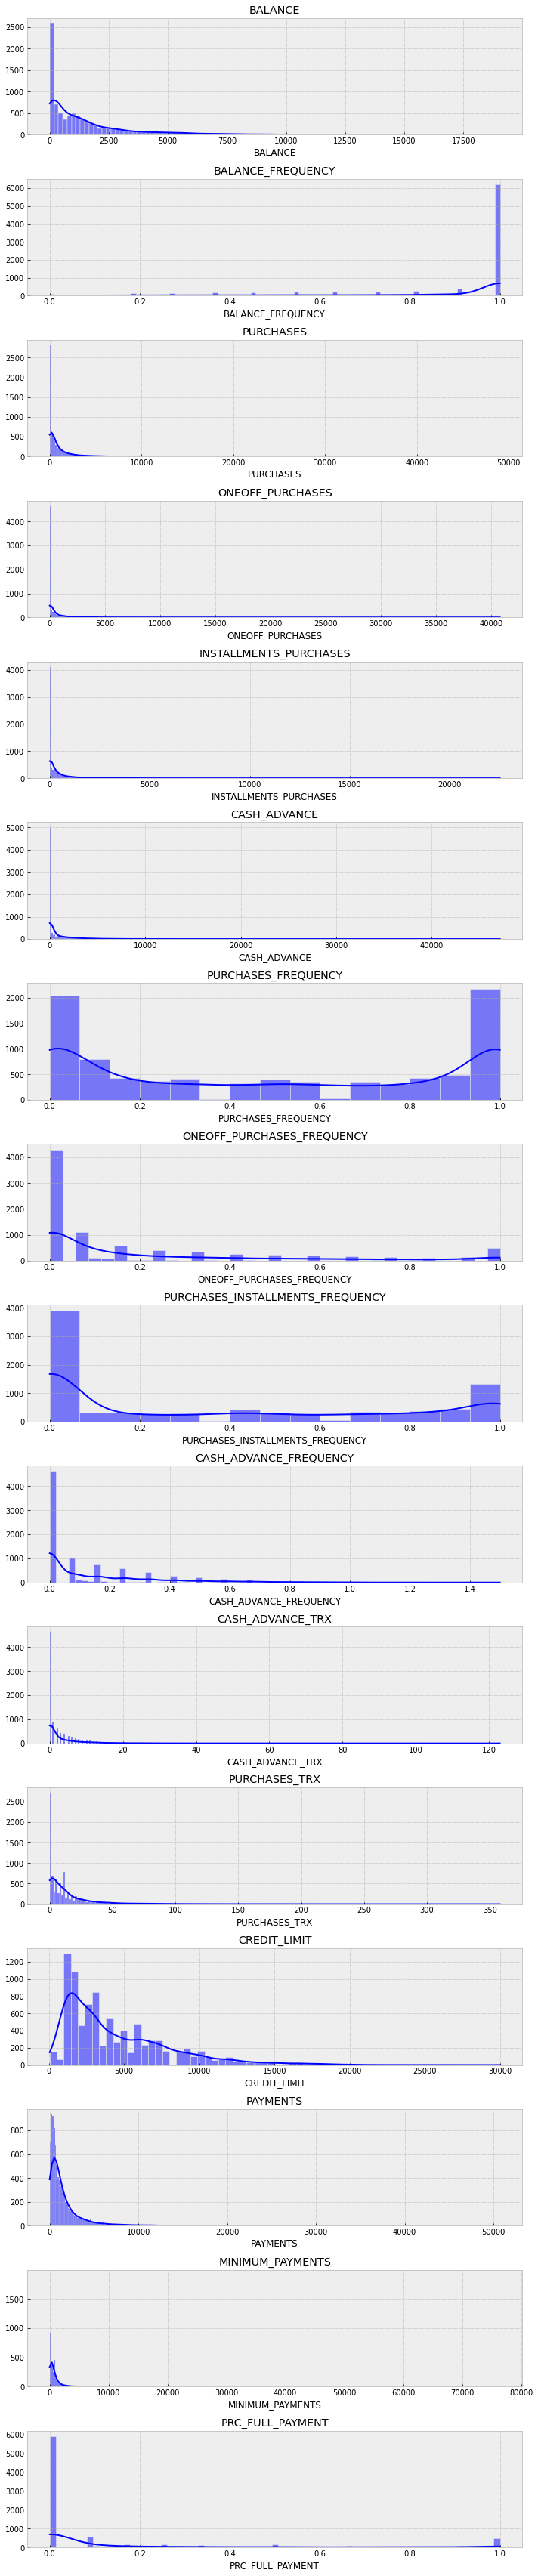

In [131]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.histplot(x=creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
  plt.ylabel('')
plt.tight_layout();

## Insights Iniciais

Alguns insights que podemos tirar da análise exploratória:

- A média do saldo em conta (balance) é de 1500 dólares

- 'Balance_Frequency' para a maioria dos clientes é atualizada frequentemente (valor próximo a 1) 

- Para a frequencia de compras (purchase_frequency), existem dois grupos distintos de clientes. 

- Quanto ao 'ONEOFF_PURCHASES_FREQUENCY' e 'PURCHASES_INSTALLMENT_FREQUENCY', a maioria dos clientes não faz compras com frequência
- Um número muito pequeno de clientes paga o valor total da conta do cartão de crédito total (PRC_FULL_PAYMENT próximo de 0)
- O crédito limite médio é cerca de 4500 dólares, o valor mínimo é 50 dólares e o maior valor é 30 mil dólares

# Pré-processamento dos Dados e Aplicação de Modelos

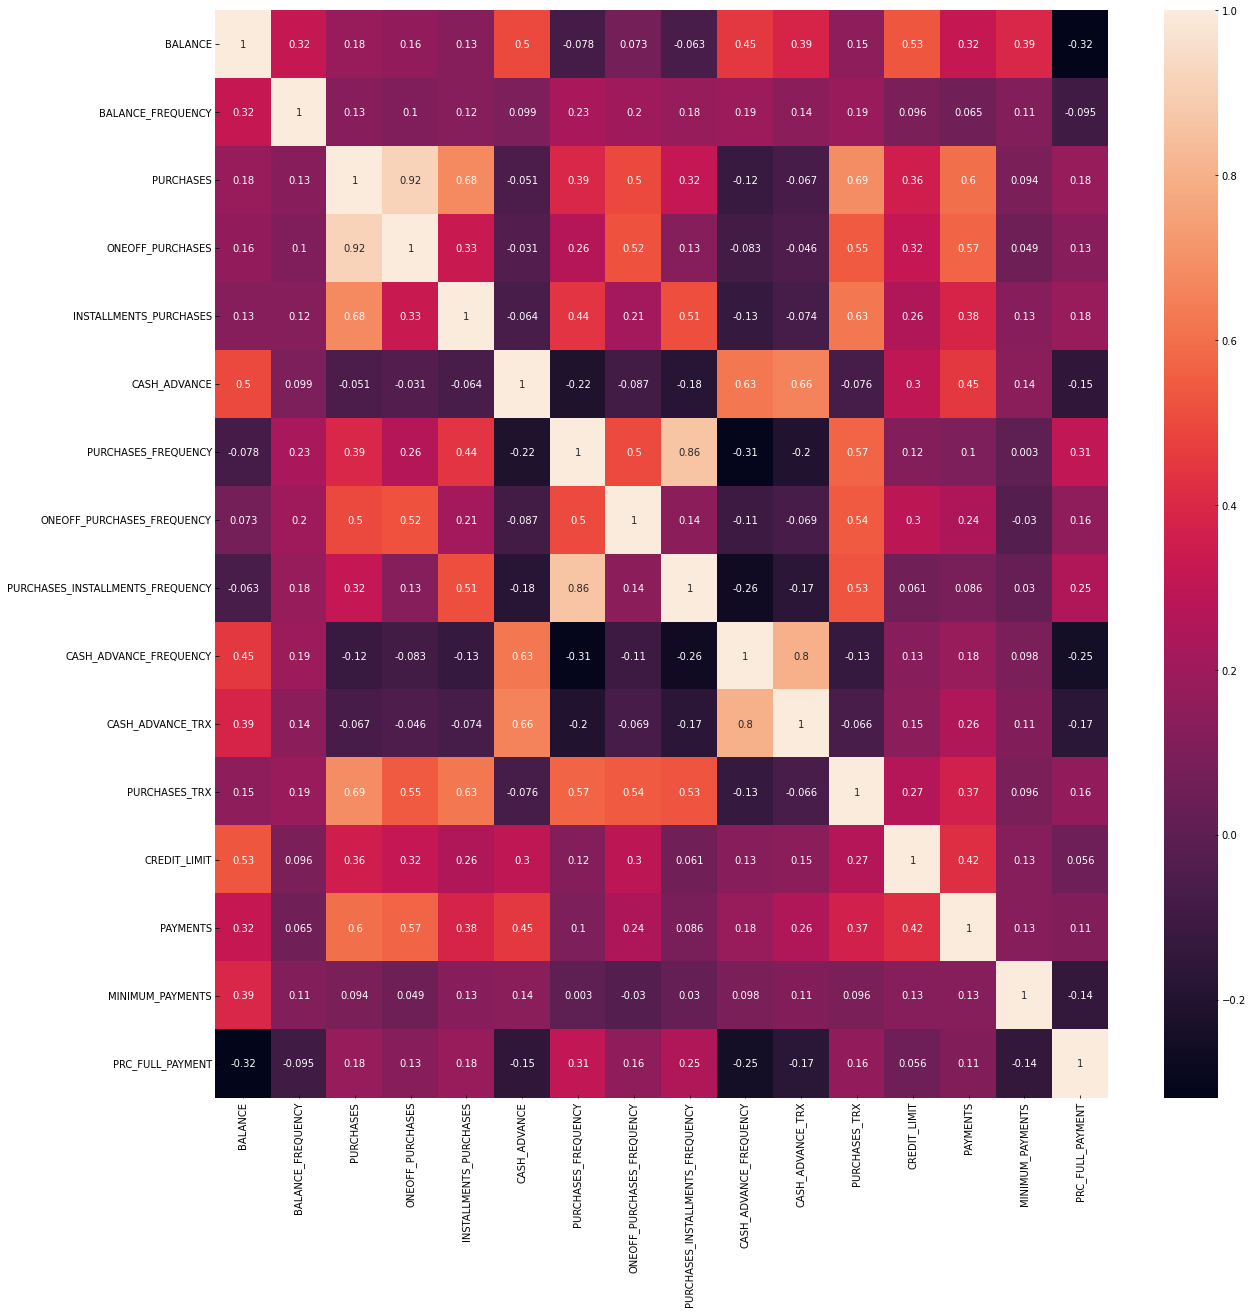

In [132]:
# Analisando o grau de correlação entre as variáveis
correlacao = creditcard_df.corr()

# Para facilitar a visualização dos graus de correlação, criaremos um mapa de calor 
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlacao, annot=True);

## Normalização das variáveis númericas

- Uma das estapas do tratamento de dados é a normalização das variáveis, deixando-as em uma mesma escala.

- O objetivo é evitar que o algoritmo fique enviesado e dê mais importância para as variáveis com maior ordem de grandeza (maior variância).

- Um exemplo é a diferença das escalas das variáveis `PAYMENTS` (0 a 50721) e `BALANCE_FREQUENCY` (0 a 1). Sem a aplicação da normalização, o algoritmo entenderia que a a variável `PAYMENTS` é mais significativa apenas pela diferença nas escalas

In [133]:
# Vizualiando os valores mínimo e máximo da variável 'BALANCE' 
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [134]:
# Aplicamos o método Standard Scaler e criames um Dataframe com as colunas com os valores normalizados

scaler = StandardScaler()
creditcard_df_scaled = pd.DataFrame(scaler.fit_transform(creditcard_df), columns=creditcard_df.columns)

In [135]:
creditcard_df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551


## Definindo o número de clusters

- Antes de aplicar o Kmeans, precisamos definir o número de clusters ou grupos, em que iremos dividir o dataset, e para isso, usaremos o **método do cotovelo**(Elbow Method)
- Esse método roda o KMeans para quantidades diferentes de clusters e diz qual dessas quantidades é o número ótimo de clusters.
- O que geralmente acontece ao aumentar a quantidade de clusters no KMeans é que as diferenças entre clusters se tornam muito pequenas, e as diferenças das observações intra-clusters vão aumentando.
- Assim, é preciso achar um equilíbrio em que as observações que formam cada agrupamento sejam o mais homogêneas possível e que os agrupamentos formados sejam o mais diferentes um dos outros.

In [136]:
# Iremos criar uma função que retorne uma lista com o valor do wcss/inertia (média das distâncias de cada ponto em relação ao centro do cluster)
# Para cada quantidade de clusters (1 a 10)
# Quanto menor o wcss/inertia, melhor

def calcular_wcss():
  wcss_1 = []
  range_values = range(1, 20)
  for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    wcss_1.append(kmeans.inertia_)
  return wcss_1

# Atribuindo o retorno da função criada a uma variável
wcss_1 = calcular_wcss()

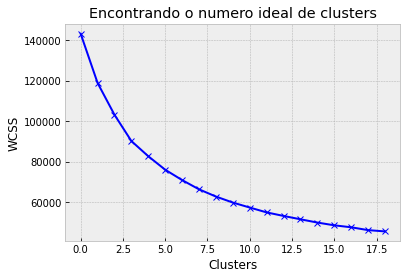

In [137]:
# Vamos plotar um gráfico com a relação entre os valores do WCSS e o número de cluster

plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.title('Encontrando o numero ideal de clusters');

- Em conjunto com o método do cotovelo, vamos usar o **método da silhueta** (Silhouette Method) para definir o número ideal de clusters.
- Esse método calcula a distância média entre uma amostra e o cluster mais próximo do qual a amostra não faz parte.
- O melhor valor é 1 e o pior valor é -1. Valores próximos a 0 indicam clusters sobrepostos. Valores negativos geralmente indicam que uma amostra foi atribuída ao cluster errado, pois um cluster diferente é “mais semelhante”.

In [138]:
# Importando o método da silhueta

from sklearn.metrics import silhouette_score
  
  
num_de_clusters = [4, 5, 6, 7, 8]
  
for n_clusters in num_de_clusters:
  
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(creditcard_df_scaled)
  
    # O silhouette_score dá a média dos valores de toda a amostra.
    silhouette_avg = silhouette_score(creditcard_df_scaled, cluster_labels)
  
    print("Para o número de clusters =", n_clusters,
          " A média do silhouette_score é:", silhouette_avg)

Para o número de clusters = 4  A média do silhouette_score é: 0.2166780182534037
Para o número de clusters = 5  A média do silhouette_score é: 0.21230825554352498
Para o número de clusters = 6  A média do silhouette_score é: 0.22409612074662172
Para o número de clusters = 7  A média do silhouette_score é: 0.23147796169632257
Para o número de clusters = 8  A média do silhouette_score é: 0.23621619903219007



O número ideal k de divisões do dataset é 7 clusters, pois foi o que teve o maior score no método da silhueta (0.23). Agora já podemos criar o modelo K-means

## Agrupamento com k-means

In [139]:
# Instanciando o modelo com o número de clusters igual a 7
# e treinando o com o nosso dataset normalizado

kmeans = KMeans(n_clusters=7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [140]:
# As labels (0, 1, 2, 3, 4, 5, 6) indicam a qual dos sete clusters cada registro do dataset pertence

pd.Series(labels).value_counts()

5    2870
2    2342
0    1215
6     996
4     915
3     582
1      30
dtype: int64

In [141]:
# o centro do cluster, ou centróide, é o 'endereço' definido por um valor de cada variável 
kmeans.cluster_centers_

array([[-6.95499395e-01, -2.19453688e+00, -3.25997262e-01,
        -2.42064075e-01, -3.25977370e-01, -2.98756162e-01,
        -5.91719993e-01, -4.50866006e-01, -4.70530377e-01,
        -4.78155429e-01, -3.52810799e-01, -4.36168574e-01,
        -2.34081682e-01, -2.20418366e-01, -2.51768490e-01,
         7.23112192e-02],
       [ 1.92305052e+00,  3.37716867e-01,  1.12120418e+01,
         1.06003671e+01,  7.03311838e+00,  4.19625127e-01,
         1.04698328e+00,  1.91550149e+00,  9.81333653e-01,
        -2.58911831e-01,  6.12285458e-02,  5.36243850e+00,
         3.04406408e+00,  8.09897492e+00,  1.12031761e+00,
         1.11013157e+00],
       [-1.79051173e-01,  3.81549693e-01,  2.15376937e-02,
        -5.78352628e-02,  1.57216177e-01, -3.14308743e-01,
         9.16258138e-01,  2.36266568e-01,  8.06404932e-01,
        -3.63531384e-01, -3.03078632e-01,  2.13963667e-01,
        -2.13242975e-01, -1.81808615e-01, -4.35028273e-03,
        -3.33738214e-01],
       [ 7.16946811e-01,  4.62258123e

In [142]:
# Vamos transfomar esses 'endereços' do centro do cluster em um dataframe.
# Os valores estão normalizados, eis que usamos o dataframe foi normalizado anteriormente no algoritmo K-means

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-0.695499,-2.194537,-0.325997,-0.242064,-0.325977,-0.298756,-0.591720,-0.450866,-0.470530,-0.478155,-0.352811,-0.436169,-0.234082,-0.220418,-0.251768,0.072311
1,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132
2,-0.179051,0.381550,0.021538,-0.057835,0.157216,-0.314309,0.916258,0.236267,0.806405,-0.363531,-0.303079,0.213964,-0.213243,-0.181809,-0.004350,-0.333738
3,0.716947,0.462258,1.999737,1.678448,1.644742,-0.220002,1.156171,1.732705,1.072870,-0.320460,-0.234613,2.358570,1.164282,1.094461,0.301089,0.248417
4,1.623326,0.379105,-0.214595,-0.145083,-0.240927,1.988670,-0.466587,-0.170884,-0.435312,1.925893,1.896531,-0.267131,0.992938,0.780368,0.523696,-0.391338
5,-0.001591,0.367035,-0.365107,-0.243035,-0.416678,-0.055303,-0.905788,-0.408822,-0.802898,0.175806,-0.001782,-0.499596,-0.329231,-0.262730,-0.027280,-0.450617
6,-0.693959,0.093696,0.089620,-0.035377,0.276475,-0.447893,0.897065,0.258635,0.733196,-0.642159,-0.458562,0.173528,0.051334,-0.147012,-0.294847,2.175805


In [143]:
# Vamos agora aplicar um método que reverte a normalização das variáveis. 
# Assim temos novamente seus valores reais (ainda o dataframe dos 'endereços' do centro de cada cluster)

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,116.851545,0.357405,306.706658,190.660584,116.290354,352.365485,0.252865,0.067956,0.177437,0.039460,0.841152,3.868313,3642.764522,1095.054281,277.470696,0.174864
1,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409
2,1191.794925,0.967656,1049.220448,496.442680,553.236283,319.750995,0.858089,0.272941,0.684923,0.062398,1.180538,20.028169,3718.584263,1206.825727,854.068392,0.056102
3,3056.739097,0.986775,5275.674519,3378.318024,1898.387423,517.516176,0.954378,0.719357,0.790823,0.071017,1.647766,73.335052,8730.584192,4901.502298,1565.881442,0.226372
4,4943.290296,0.967077,544.719158,351.629519,193.200754,5149.204860,0.303087,0.151480,0.191433,0.520535,16.191257,8.069945,8107.163438,3992.233132,2084.657266,0.039255
5,1561.162552,0.964218,223.148160,189.049822,34.270830,862.897753,0.126814,0.080498,0.045345,0.170325,3.236668,2.291739,3296.572557,972.566110,800.631944,0.021917
6,120.057398,0.899466,1194.680060,533.719227,661.080291,39.618433,0.850386,0.279613,0.655828,0.006642,0.119478,19.023092,4681.224443,1307.557773,177.078501,0.790100


- Já poderíamos tirar algumas conclusões desse dataframe com as médias de cada valor do centro dos clusters. 
- Porém, vamos melhorar primeiro o nosso algoritmo, assim poderemos tirar insights mais apurados

In [144]:
# Vamos adicionar uma coluna chamada 'cluster' no dataframe creditcard_df
# Indicando o grupo a que pertence cada cliente

creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,5


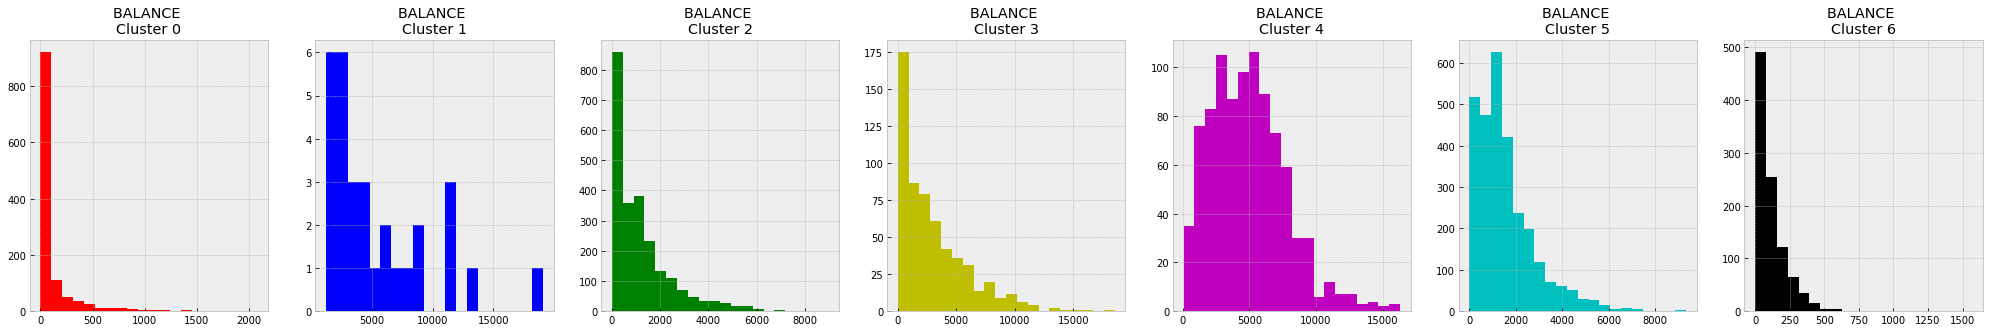

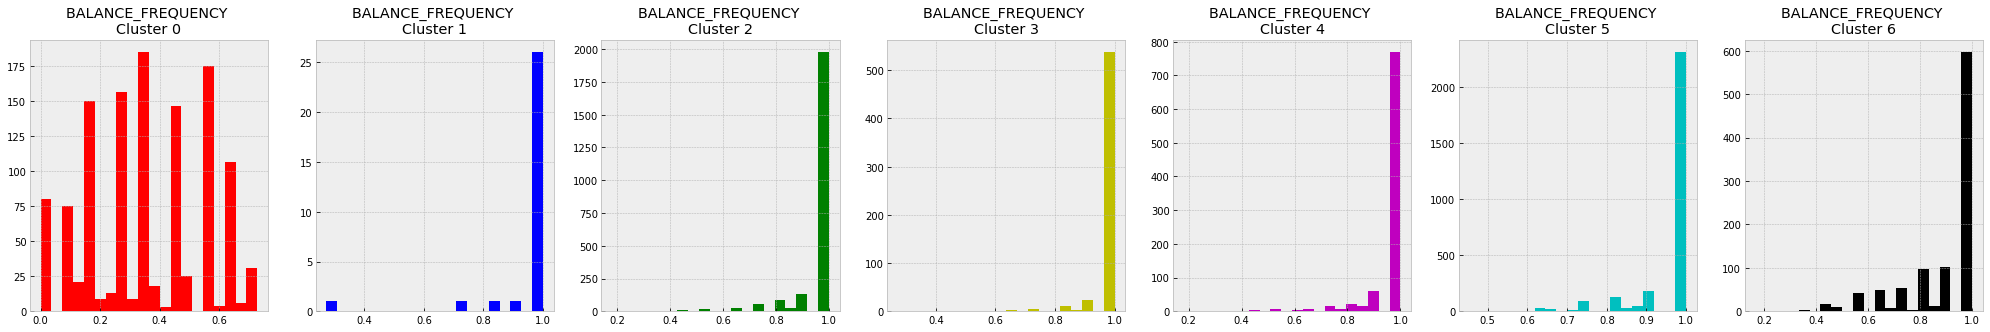

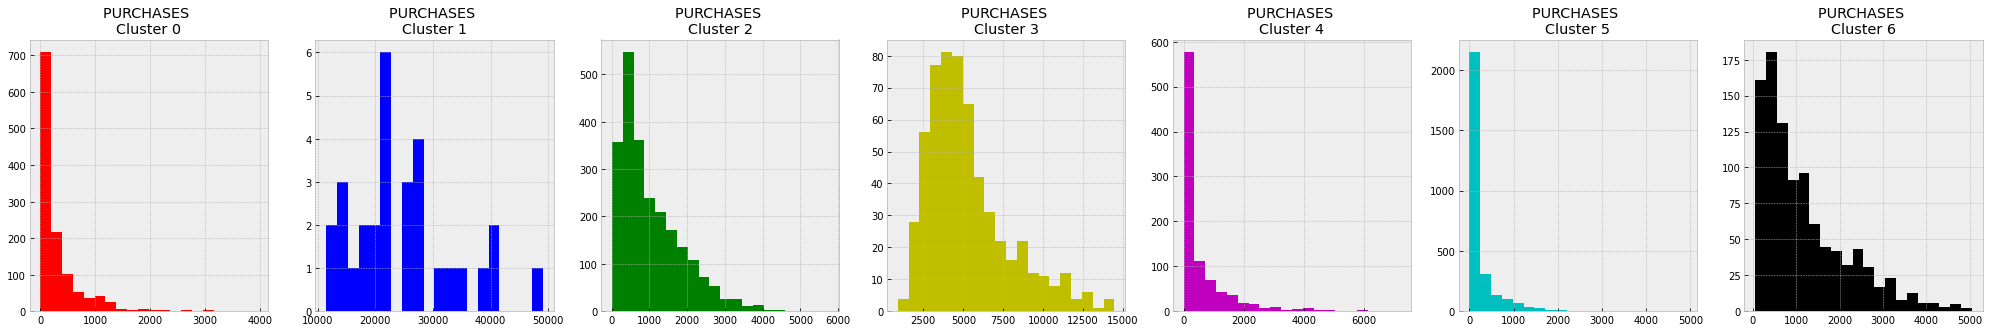

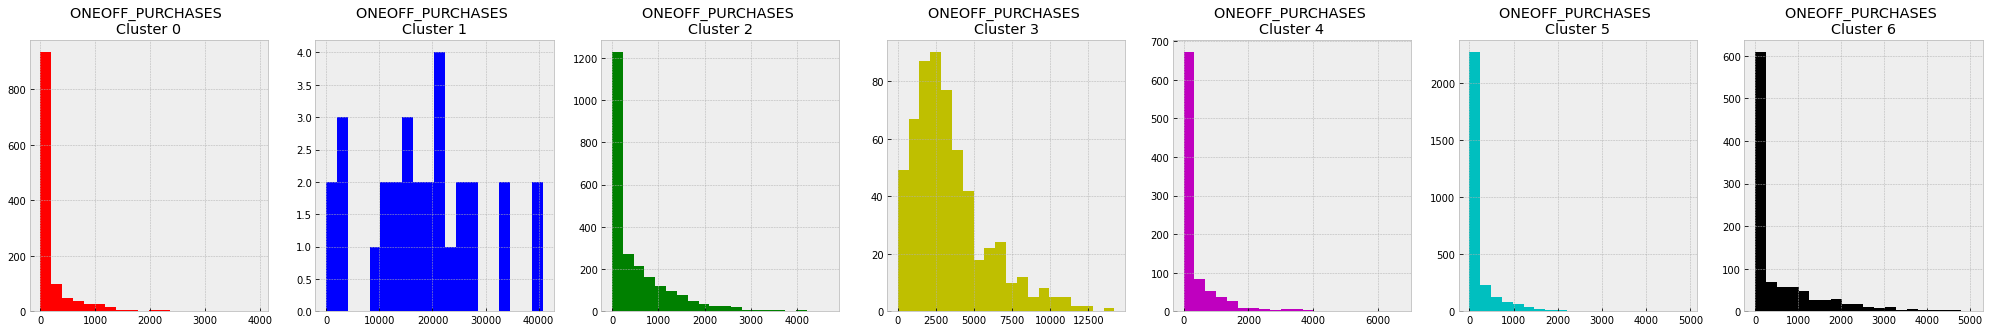

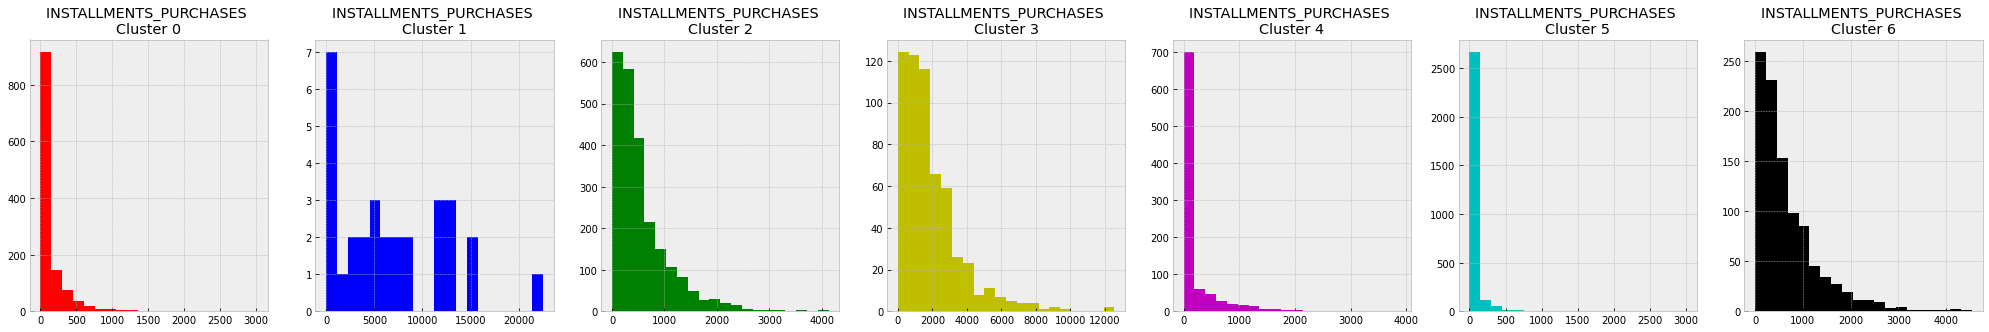

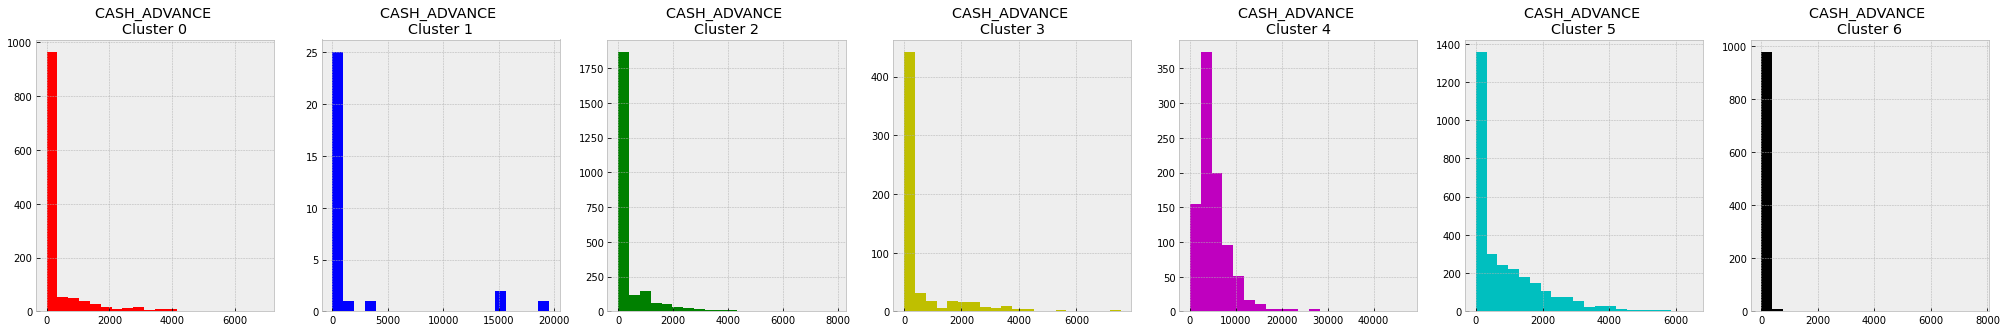

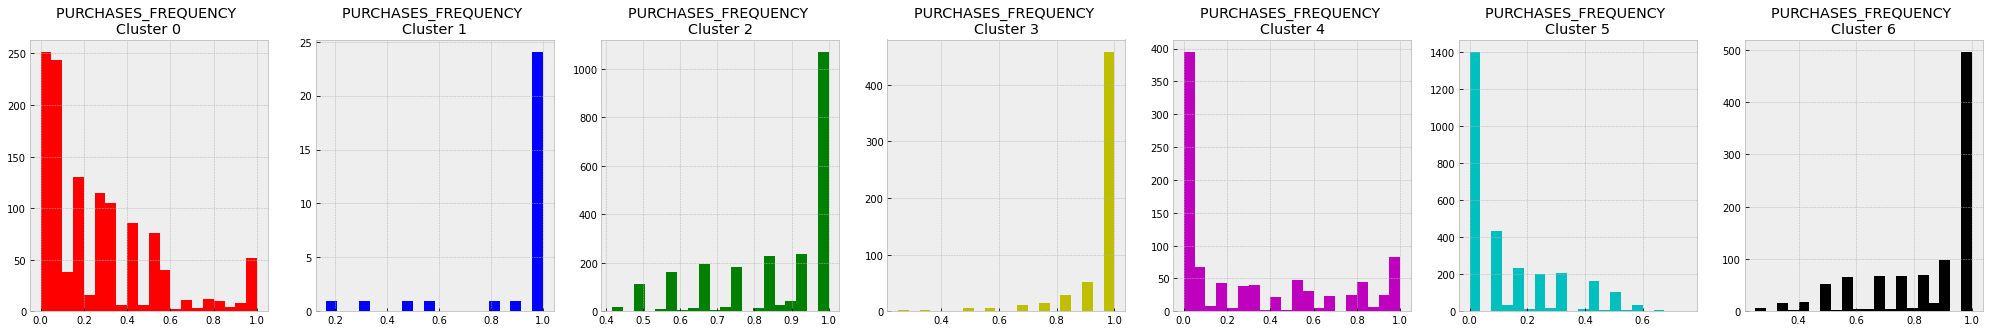

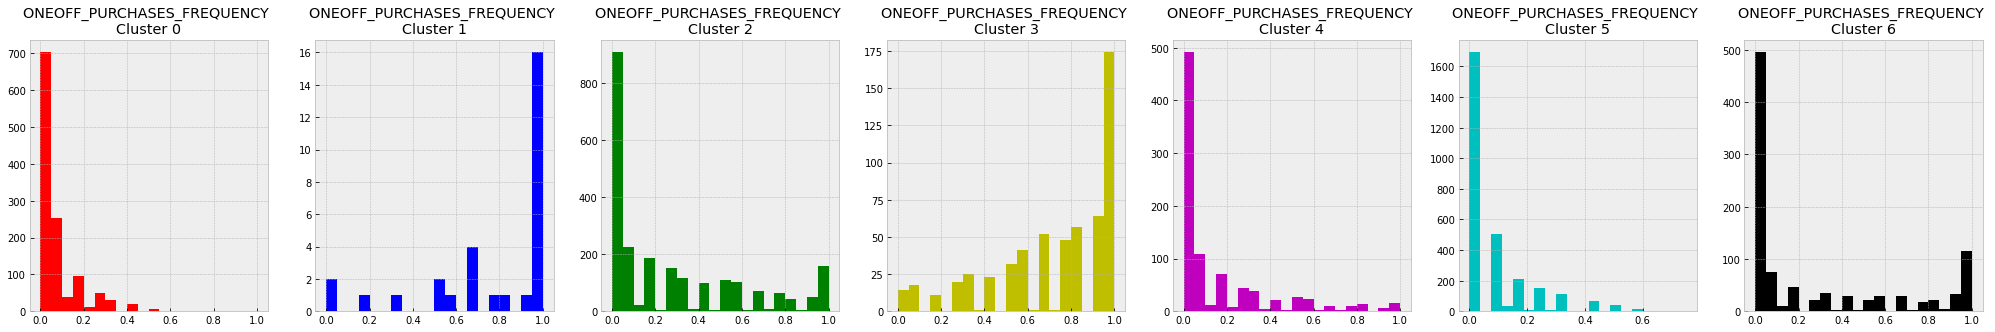

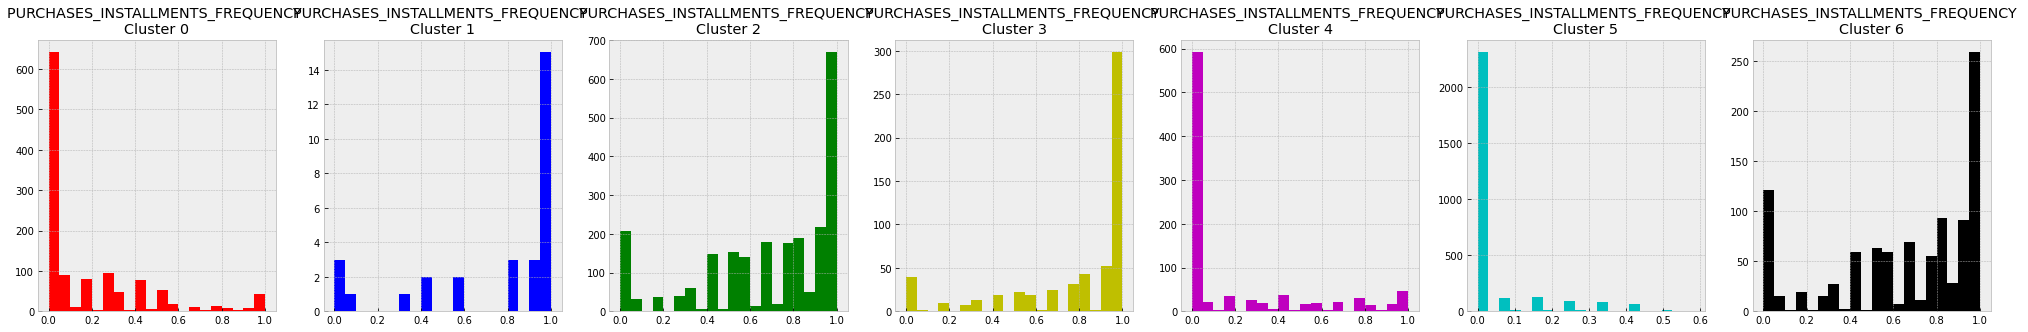

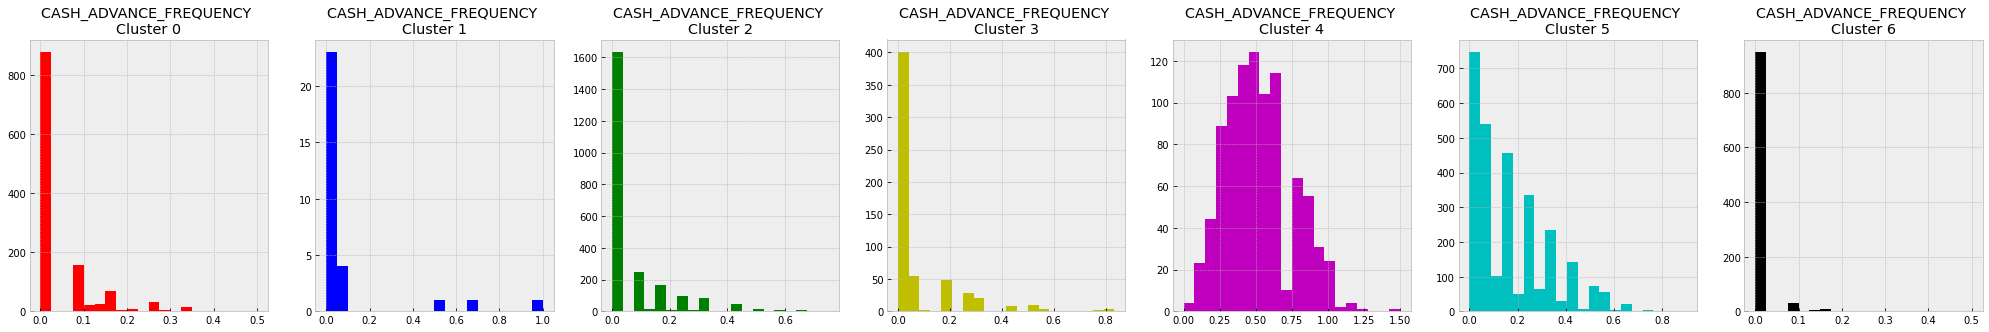

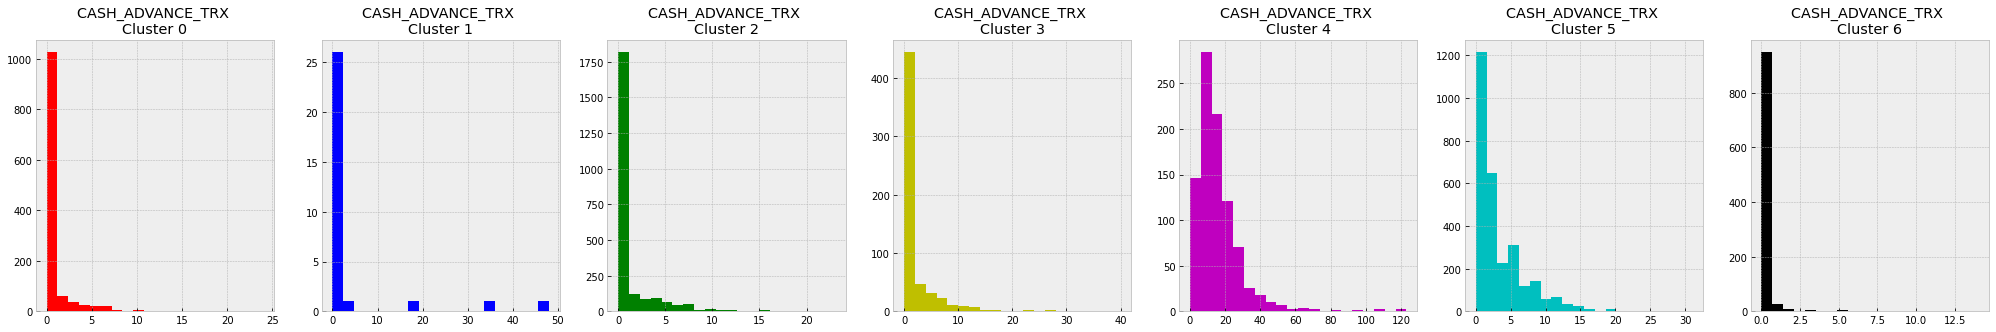

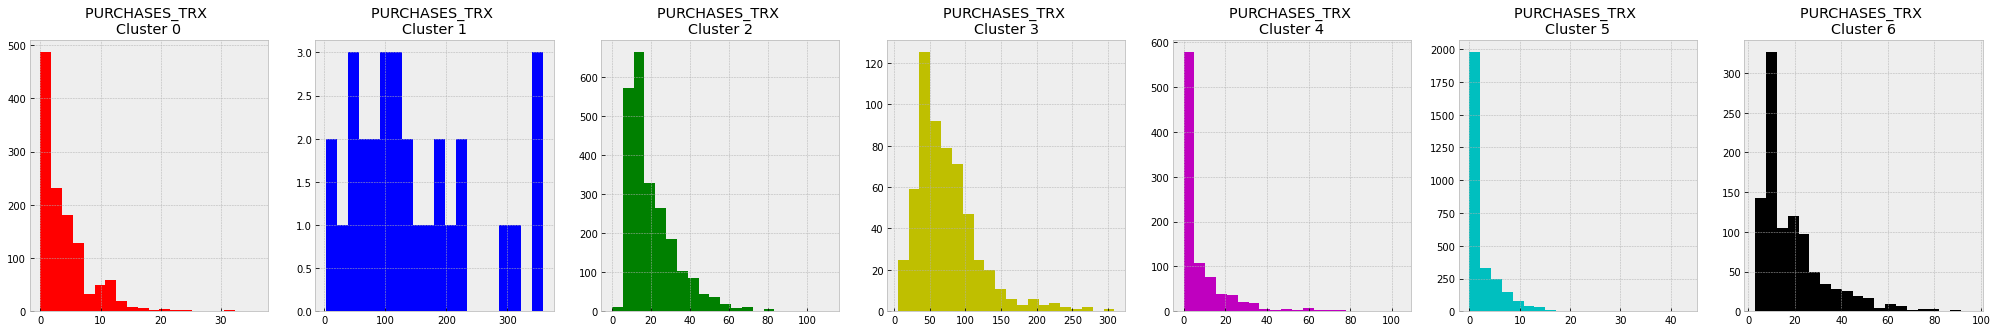

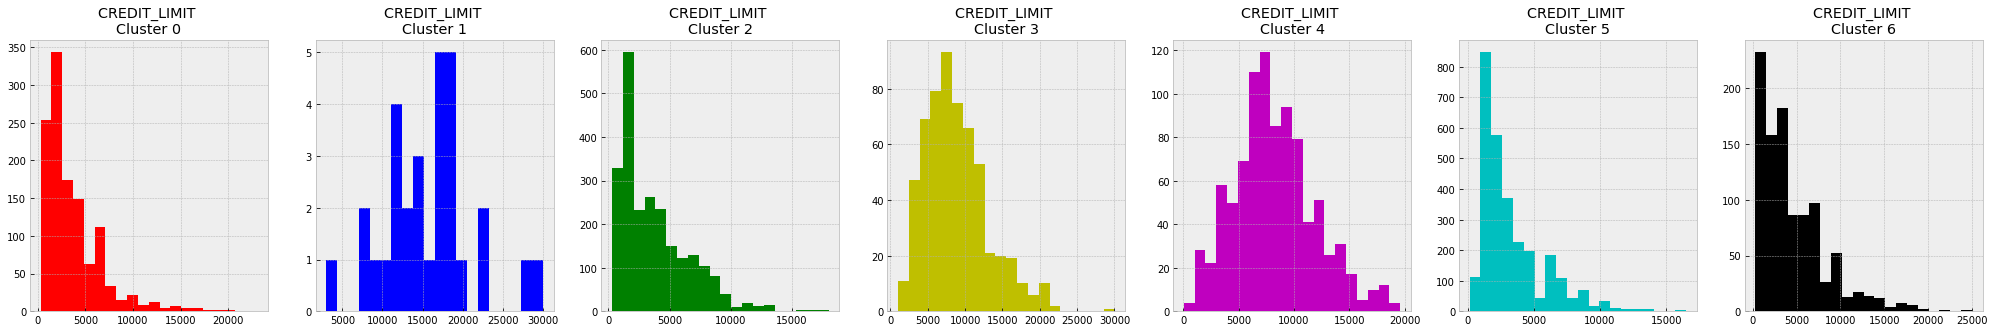

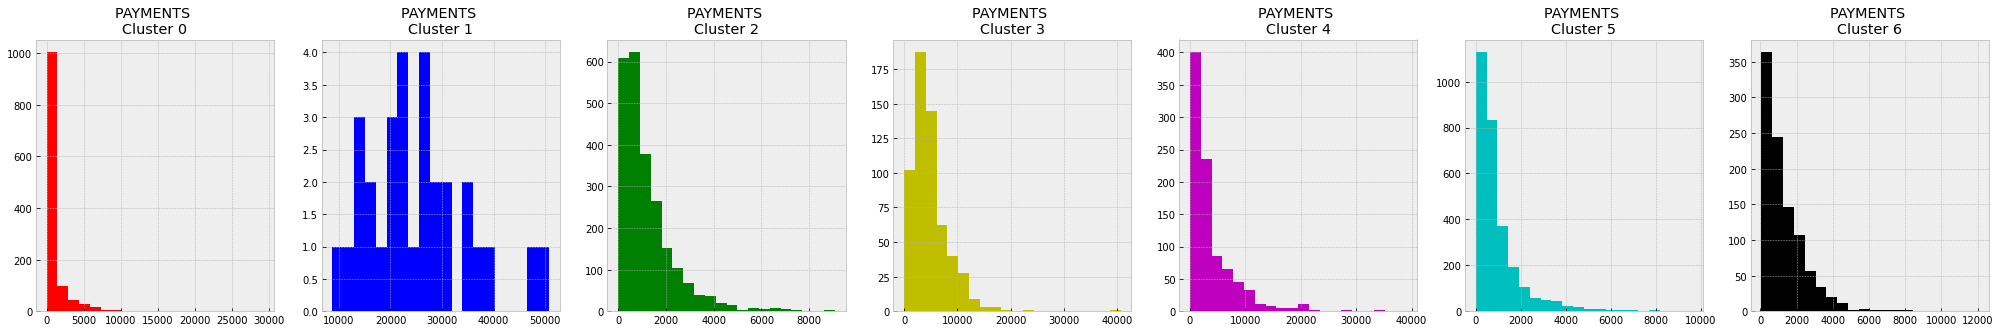

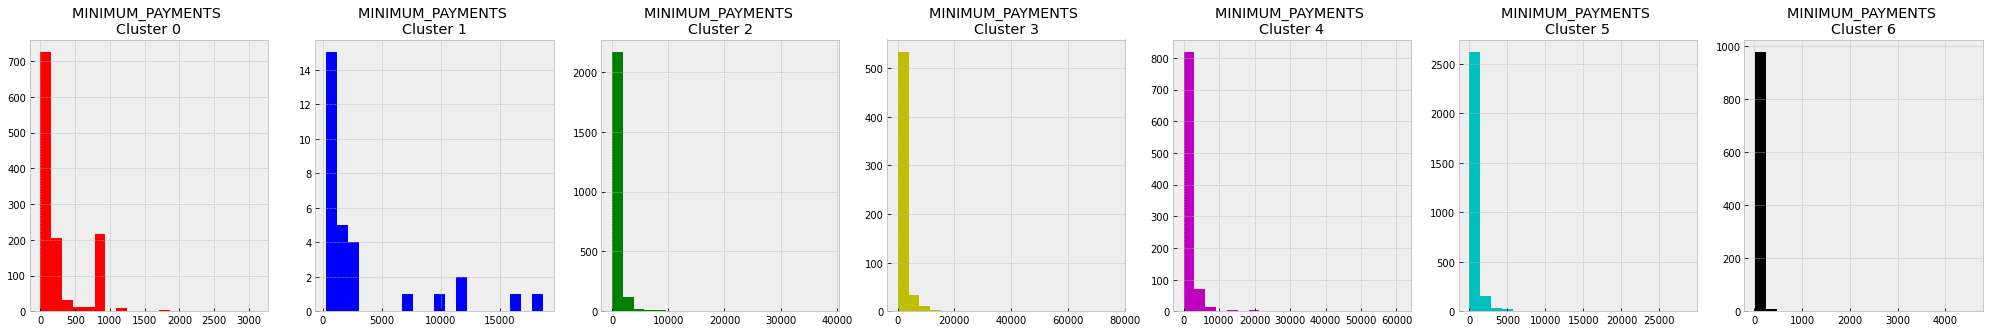

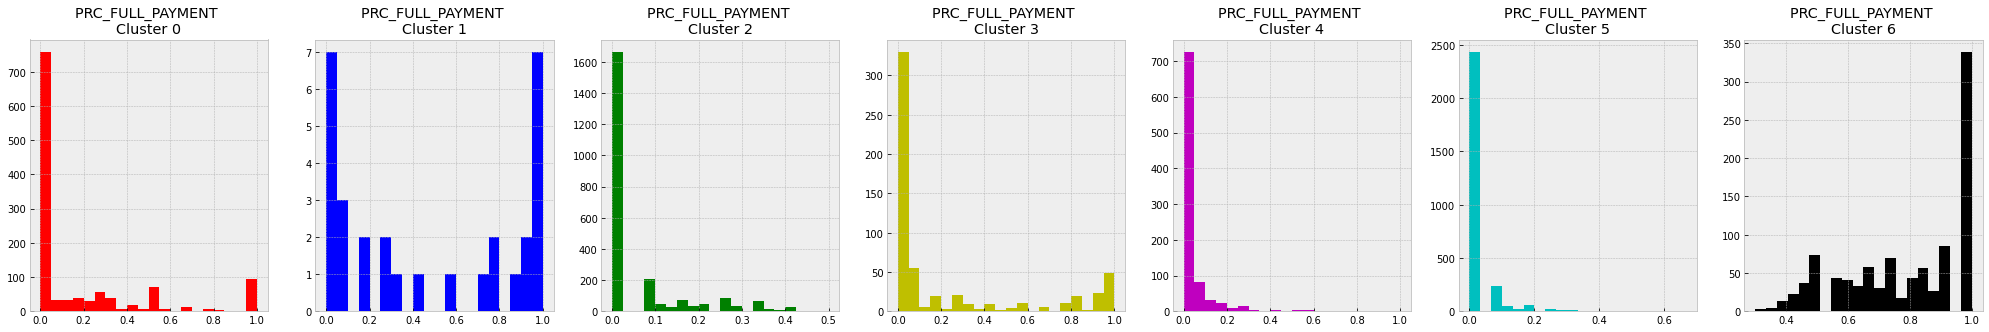

In [145]:
# Vamos plotar alguns gráficos de distribuição de frequeência de cada uma das variáveis, de acordo com o cluster correspondente

color = ['r', 'b', 'g', 'y', 'm', 'c', 'k']
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j,c in zip(range(7), color):
    plt.subplot(1, 7, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20, color=c)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [146]:
# Vamos criar um dataframe ordenado por clusters

credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
4843,42.755706,0.545455,350.94,284.29,66.65,0.000000,0.250000,0.250000,0.250000,0.000000,0,9,5000.0,1191.823088,195.006921,0.400000,0
7971,6.692421,0.545455,333.42,0.00,333.42,0.000000,0.583333,0.000000,0.583333,0.000000,0,12,4000.0,318.713472,1.113027,0.000000,0
6991,10.805893,0.166667,76.51,50.93,25.58,0.000000,0.166667,0.166667,0.166667,0.000000,0,2,2500.0,0.000000,864.206542,0.000000,0
7967,9.252573,0.454545,0.00,0.00,0.00,943.608790,0.000000,0.000000,0.000000,0.083333,1,0,1200.0,949.846251,44.502743,0.000000,0
7964,341.901741,0.500000,152.84,152.84,0.00,1008.117498,0.333333,0.333333,0.000000,0.333333,9,3,1200.0,0.000000,864.206542,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,349.086448,0.818182,2569.94,2569.94,0.00,186.415123,0.363636,0.363636,0.000000,0.090909,1,8,5000.0,3362.877104,164.400313,0.714286,6
7950,81.364936,1.000000,710.16,0.00,710.16,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,688.322495,177.762090,0.750000,6
2151,13.036611,0.818182,197.00,0.00,197.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,1000.0,224.836018,89.185960,0.444444,6
2128,132.730466,0.909091,739.98,0.00,739.98,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,9500.0,1167.353193,172.959558,0.500000,6


## Aplicação de PCA (principal component analysis) e visualização dos resultados

In [147]:
# O PCA (Principal Component Analysis) reduz a dimensionalidade do dataframe, perdendo o mínimo de informação possível
# Vamos usa-lo para reduzir o dataframe para duas variáveis, para podermos ver os gráficos dos clusters em duas dimensões

pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.71889195, -1.07294478],
       [-1.16931092,  2.50935324],
       [ 0.93841356, -0.38259472],
       ...,
       [-0.5938804 , -1.82810913],
       [-2.00767212, -0.67376531],
       [-0.217937  , -0.41846026]])

In [148]:
# Criando um dataframe apenas com as duas variáveis principais

pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.718892,-1.072945
1,-1.169311,2.509353
2,0.938414,-0.382595
3,-0.907504,0.045868
4,-1.637828,-0.684987


In [149]:
# Podemos ver que o dataframe reduzido tem apenas duas colunas (dois componentes principais) após a aplicação do PCA
# Mas ainda possui o mesmo número de linhas que o dataset original

pca_df.shape, creditcard_df.shape

((8950, 2), (8950, 16))

In [150]:
# Vamos unir o dataframe PCA com a coluna de cluster, indicando a qual cluster pertence cada registro
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.718892,-1.072945,5
1,-1.169311,2.509353,4
2,0.938414,-0.382595,2
3,-0.907504,0.045868,5
4,-1.637828,-0.684987,5


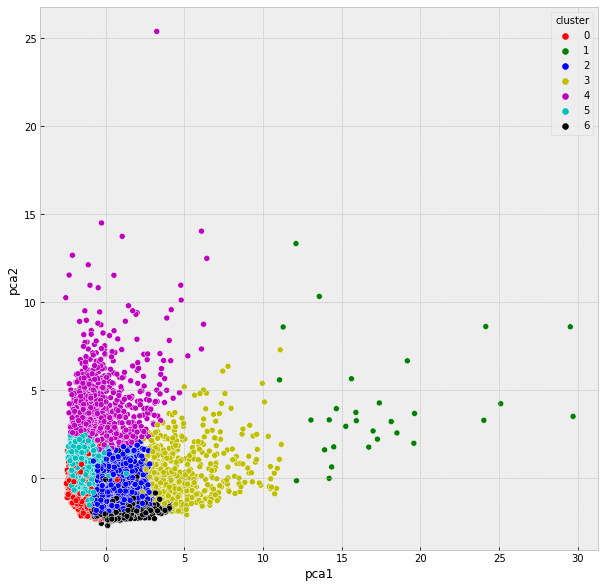

In [151]:
# Plotando um gráfico de dispersão para visualizarmos a posição de cada cluster
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['r', 'g', 'b', 'y', 'm', 'c', 'k']);

Os clusters parecem não estar muito bem definidos, pois há muita sobreposição entre pontos de cores diferentes.

Vamos tentar melhorar a divisão entre os clusters usando um tipo algoritmo de rede neural chamado Autoencoders

## Aplicação de autoencoders

<img src="autoencoder_schema.png" align="left">

Autoencoders é um tipo de algoritmo de rede neural artificial para redução de  dimensionalidade nos dados. 

Com restrições de dimensionalidade e esparsidade apropriadas, os autoencoders podem aprender projeções de dados mais interessantes que o PCA ou outras técnicas básicas.

Usaremos essa algoritmo para melhorar a divisão entre clusters feita pelo K-means 

In [152]:
# O número de features do dataset será o deve ser o número de "neurônios" de entrada da Rede Neural Autoencoder
creditcard_df_scaled.shape

(8950, 16)

In [153]:
# Importaremos a biblioteca Keras, que é uma biblioteca aberta de Deep Learning implementada utilizando TensorFlow

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [154]:
# Criaremos um rede neural com duas camadas (com 500 e 2000 neurônios)
# O modelo será no formato - 16 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 16

input_df = Input(shape=(16,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(16)(x)

In [155]:
# Definindo o autoencoder que será usado
# Baseado na entrada (input_df) e na saída (decoded)
autoencoder = Model(input_df, decoded)

In [156]:
# Definindo o encoder 
encoder = Model(input_df, encoded)

In [157]:
# Representaçã0 da rede neural
# A camada 'dense_2' é o dataset com as dimensões reduzidas, apenas dez colunas (16 -> 10 -> 16)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_6 (Dense)             (None, 500)               8500      
                                                                 
 dense_7 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_8 (Dense)             (None, 10)                20010     
                                                                 
 dense_9 (Dense)             (None, 2000)              22000     
                                                                 
 dense_10 (Dense)            (None, 500)               1000500   
                                                                 
 dense_11 (Dense)            (None, 16)                8016

In [158]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [159]:
# Aplicando o autoencoder
autoencoder.fit(creditcard_df_scaled.values, 
                creditcard_df_scaled.values, 
                epochs = 50, 
                batch_size=128,
                verbose=1)

Epoch 1/50
70/70 [==============================] - 4s 56ms/step - loss: 0.3054
Epoch 2/50
70/70 [==============================] - 4s 55ms/step - loss: 0.0541
Epoch 3/50
70/70 [==============================] - 4s 56ms/step - loss: 0.0310
Epoch 4/50
70/70 [==============================] - 4s 54ms/step - loss: 0.0233
Epoch 5/50
70/70 [==============================] - 4s 54ms/step - loss: 0.0157
Epoch 6/50
70/70 [==============================] - 4s 54ms/step - loss: 0.0142
Epoch 7/50
70/70 [==============================] - 4s 53ms/step - loss: 0.0120
Epoch 8/50
70/70 [==============================] - 4s 54ms/step - loss: 0.0108
Epoch 9/50
70/70 [==============================] - 4s 55ms/step - loss: 0.0147
Epoch 10/50
70/70 [==============================] - 4s 54ms/step - loss: 0.0115
Epoch 11/50
70/70 [==============================] - 4s 55ms/step - loss: 0.0105
Epoch 12/50
70/70 [==============================] - 4s 55ms/step - loss: 0.0194
Epoch 13/50
70/70 [==================

In [160]:
# Dataset após a aplicação do autoencoder
# Podemos ver que agora são apenas 10 colunas, e não mais 16
compact = encoder.predict(creditcard_df_scaled.values)
compact.shape

280/280 [==============================] - 1s 4ms/step


(8950, 10)

In [161]:
creditcard_df_scaled.values[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097])

In [162]:
compact[0]

array([0.91410697, 0.51442003, 0.        , 0.20745897, 0.14544798,
       0.7010318 , 0.18059602, 0.05697037, 0.83193004, 0.10759121],
      dtype=float32)

In [163]:
# Vamos comparar o gráfico entre o wcss do dataset após a aplicação do autoencoder
# Com o gráfico que fizemos antes da aplicação
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

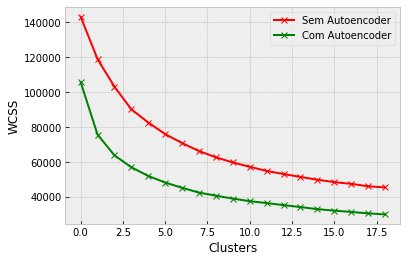

In [164]:
plt.plot(wcss_1, 'bx-', color = 'r', label='Sem Autoencoder')
plt.plot(wcss_2, 'bx-', color = 'g', label='Com Autoencoder')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.legend(loc="upper right");

In [165]:
# Vamos analisar os valores do método da silhueta após a aplicação do Autoencoders

num_de_clusters = [3, 4, 5, 6, 7, 8]
  
for n_clusters in num_de_clusters:
  
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(compact)
  
    silhouette_avg = silhouette_score(compact, cluster_labels)
  
    print("Para o número de clusters =", n_clusters,
          " A média do silhouette_score é:", silhouette_avg)

Para o número de clusters = 3  A média do silhouette_score é: 0.39642286
Para o número de clusters = 4  A média do silhouette_score é: 0.38441363
Para o número de clusters = 5  A média do silhouette_score é: 0.3098665
Para o número de clusters = 6  A média do silhouette_score é: 0.29872656
Para o número de clusters = 7  A média do silhouette_score é: 0.2216786
Para o número de clusters = 8  A média do silhouette_score é: 0.22390342


In [166]:
# O número ótimo de clusters agora é apenas 3
# O que é indicado pelo gráfico do método do cotovelo e pelo método da silhueta  
kmeans = KMeans(n_clusters=3)
kmeans.fit(compact)

KMeans(n_clusters=3)

In [167]:
labels = kmeans.labels_
labels, labels.shape

(array([0, 2, 0, ..., 0, 0, 2], dtype=int32), (8950,))

In [168]:
# Vamos juntar os labels de cada um dos três clusters (0, 1, 2) ao Dataframe original 

df_cluster_auto = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_auto.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,0


In [169]:
# Aplicando o PCA novamente para podermos ver o gráfico 2D da nova divisão
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_auto_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_auto_df.head()

,pca1,pca2
0,-2.149221,0.062170
1,2.460282,-1.742819
2,-0.243092,0.263773
3,-0.550075,0.001076
4,-1.959899,-0.072237


In [171]:
pca_auto_df = pd.concat([pca_auto_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_auto_df.head()

,pca1,pca2,cluster
0,-2.149221,0.062170,0
1,2.460282,-1.742819,2
2,-0.243092,0.263773,0
3,-0.550075,0.001076,0
4,-1.959899,-0.072237,0


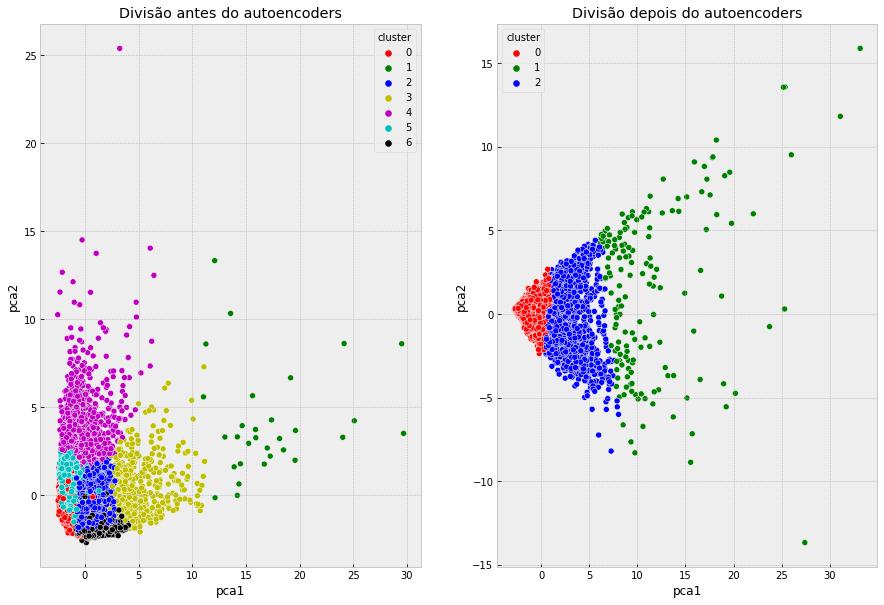

In [183]:
# Agora que aplicamos o PCA, já podemos ver o gráfico de dispersão após a aplicação do AutoEncoder

plt.figure(figsize=(15,10))

plt.subplot(1,2,2)
plt.title('Divisão depois do autoencoders')
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_auto_df, palette = ['red', 'green', 'blue']);

plt.subplot(1,2,1)
plt.title('Divisão antes do autoencoders')
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['r', 'g', 'b', 'y', 'm', 'c', 'k']);


Aqui podemos ver que usando autoencoder, conseguimos que houvesse muito menos sobreposição entre os clusters. Isto é bastante significativo, pois o objetivo deste projeto é dividir os clientes em grupos o mais heterogênios possíveis. Poderemos dizer à instituição bancária que ela possui 3 tipos bastante distintos de clientes, e cada um deve ser abordado de uma maneira diferente.  



In [184]:
# Dataframe dividido por clusters
df_cluster_ordered = df_cluster_auto.sort_values(by = 'cluster')
df_cluster_ordered

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,0
4685,1849.017387,1.000000,0.00,0.00,0.00,838.008227,0.000000,0.000000,0.000000,0.166667,2,0,2500.0,433.218956,837.778500,0.0,0
7615,2646.022772,1.000000,1541.13,487.00,1054.13,1234.504809,0.916667,0.250000,0.833333,0.333333,6,17,4000.0,600.203047,575.913224,0.0,0
4683,19.946102,1.000000,450.00,0.00,450.00,0.000000,1.000000,0.000000,0.900000,0.000000,0,10,1000.0,386.571651,131.349565,1.0,0
4682,1089.795044,1.000000,0.00,0.00,20.00,38.249993,0.000000,0.000000,0.166667,0.083333,1,1,1200.0,284.731156,331.103830,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4273,1983.111978,1.000000,1119.56,1119.56,0.00,5582.881679,0.333333,0.333333,0.000000,0.416667,9,13,7000.0,6892.546158,467.408433,0.0,2
4283,2339.037958,1.000000,1823.56,0.00,1823.56,435.165222,1.000000,0.000000,1.000000,0.083333,2,20,1800.0,890.623152,16638.354100,0.0,2
4284,4709.342642,1.000000,1614.27,1193.06,421.21,588.059618,0.916667,0.916667,0.750000,0.083333,1,56,7500.0,1276.037300,1207.453510,0.0,2
4291,674.119098,1.000000,3146.25,449.10,2697.15,0.000000,1.000000,0.333333,1.000000,0.000000,0,93,4000.0,2602.065596,189.152731,0.0,2


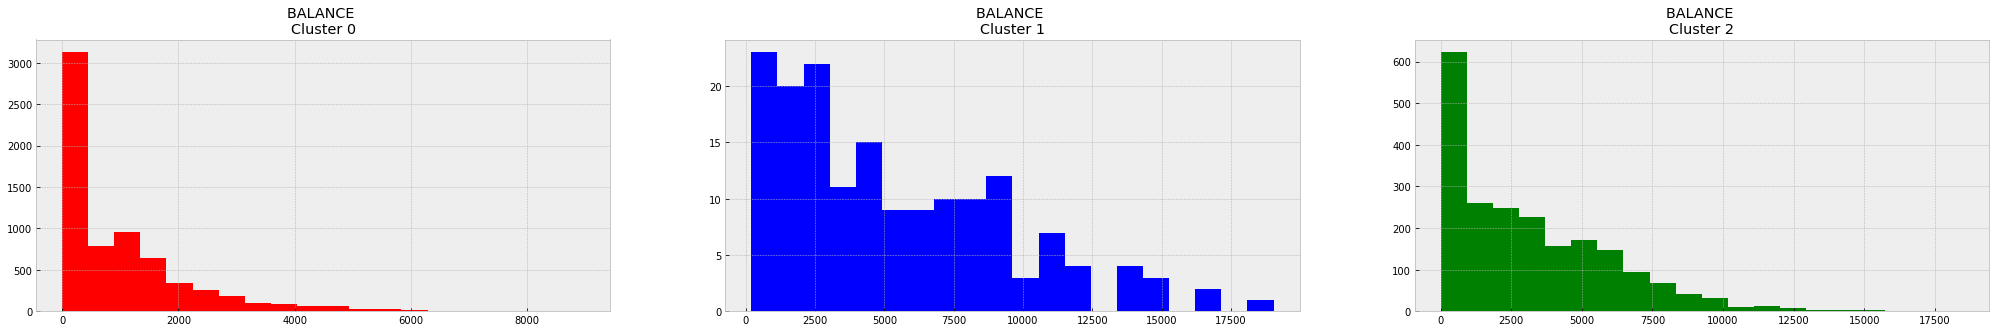

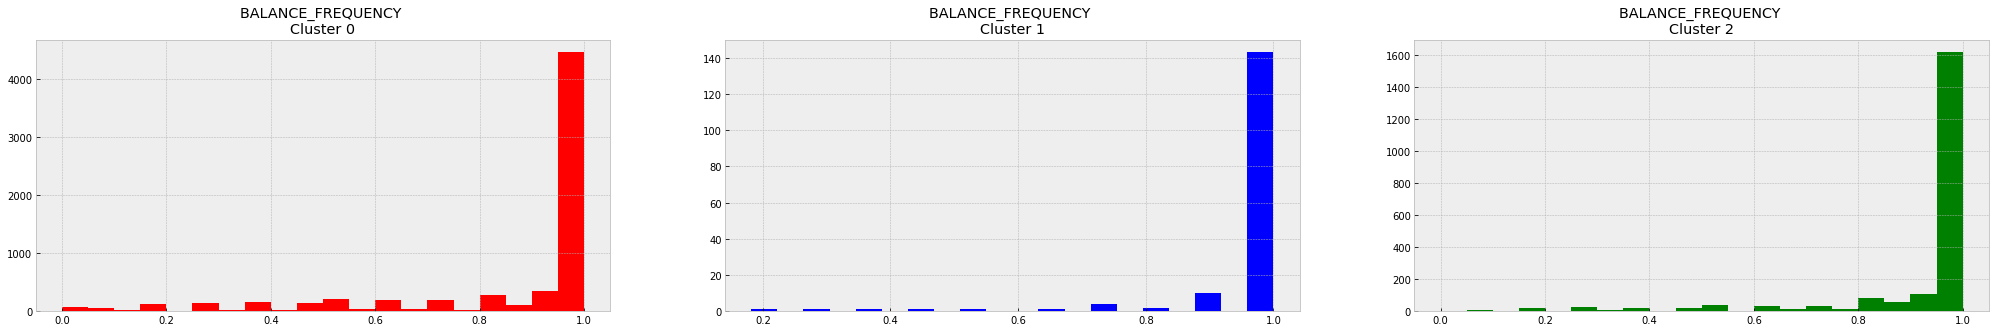

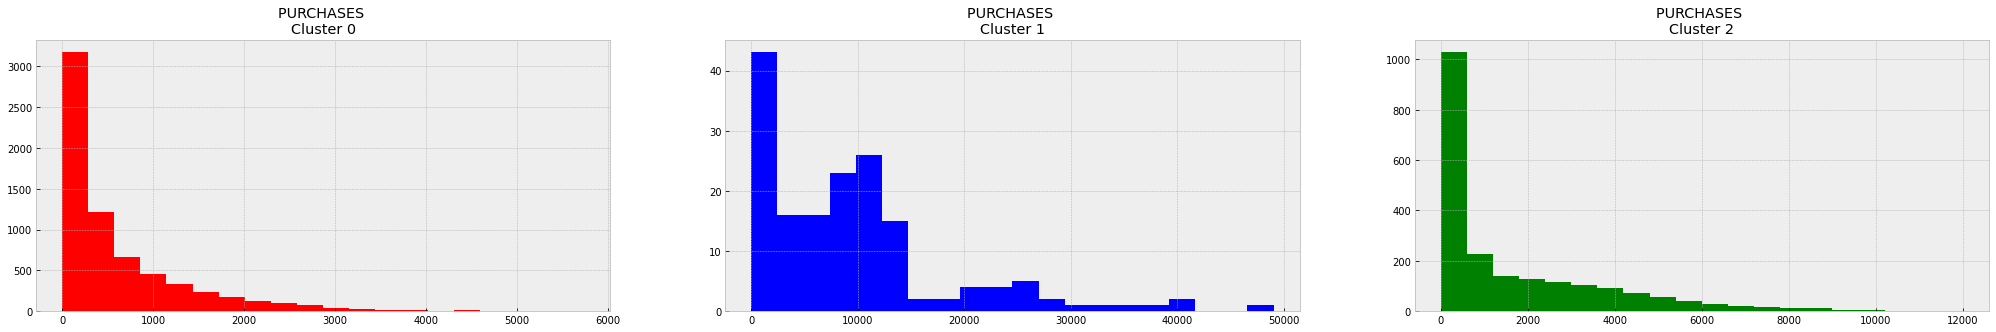

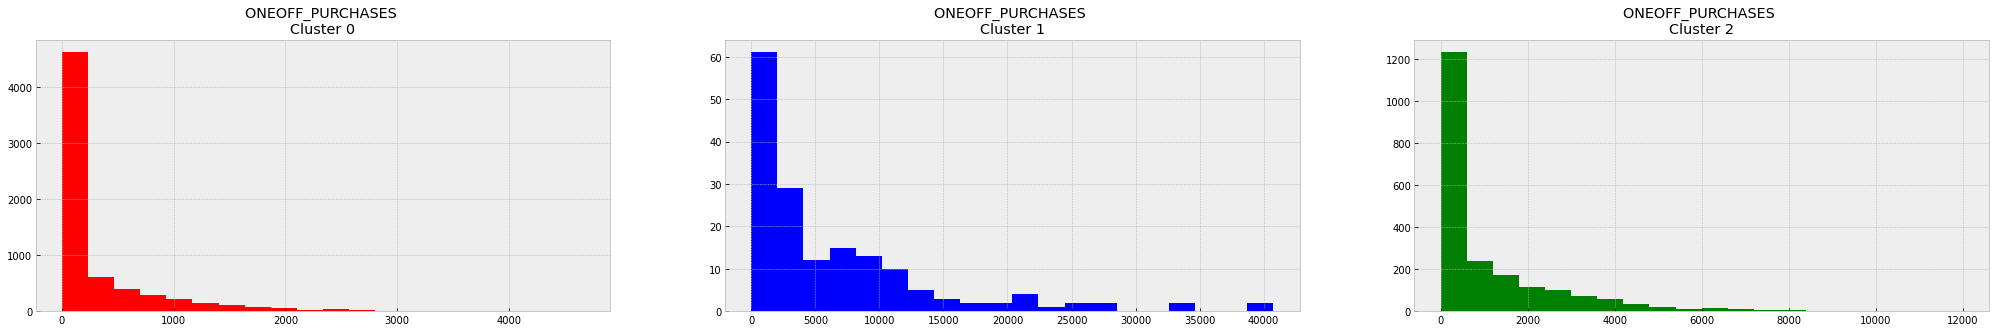

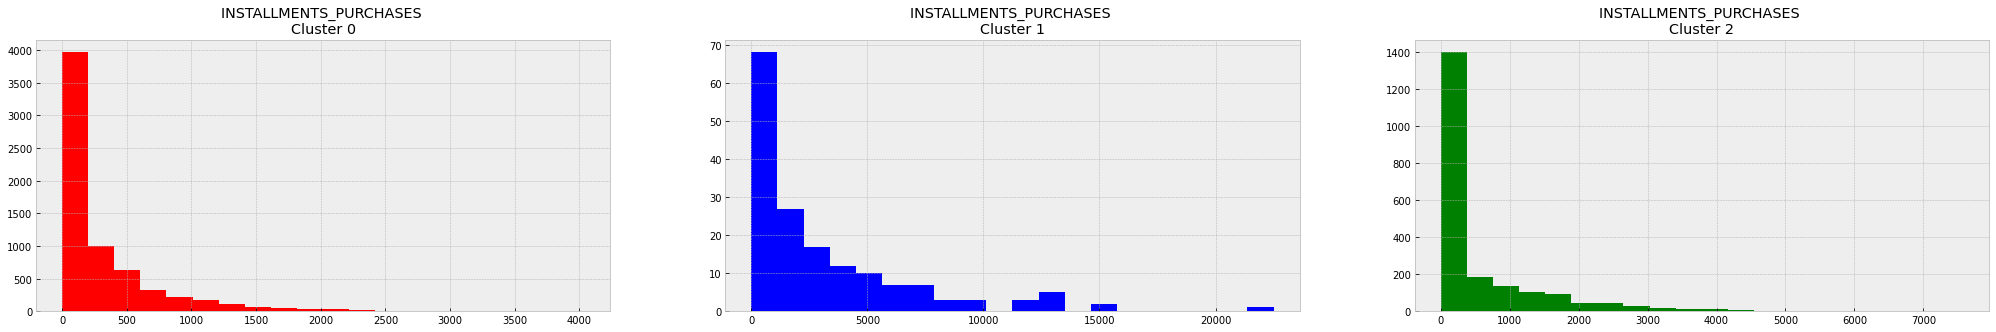

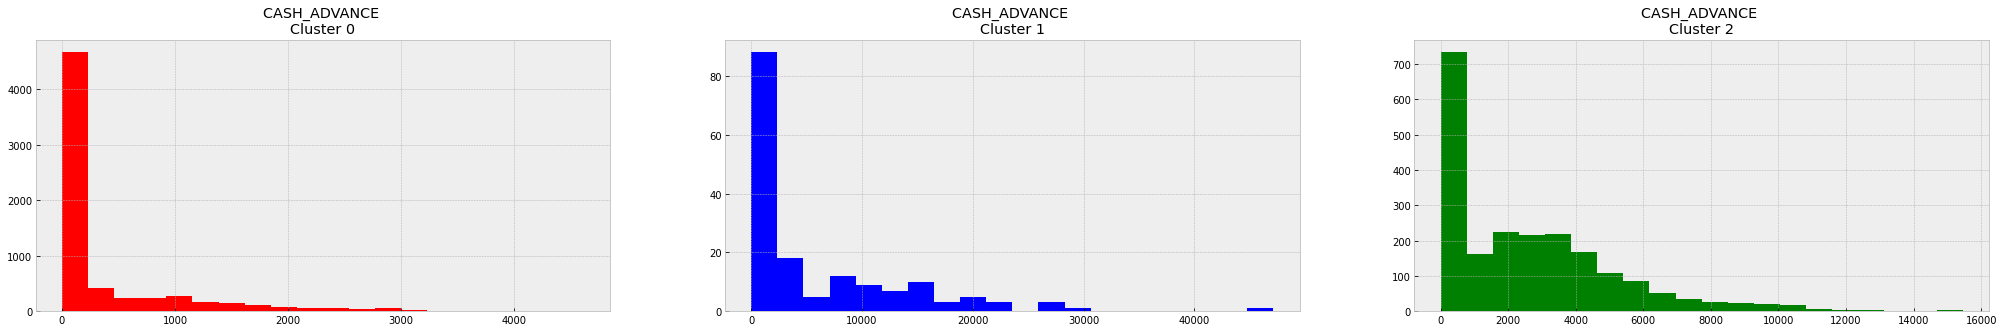

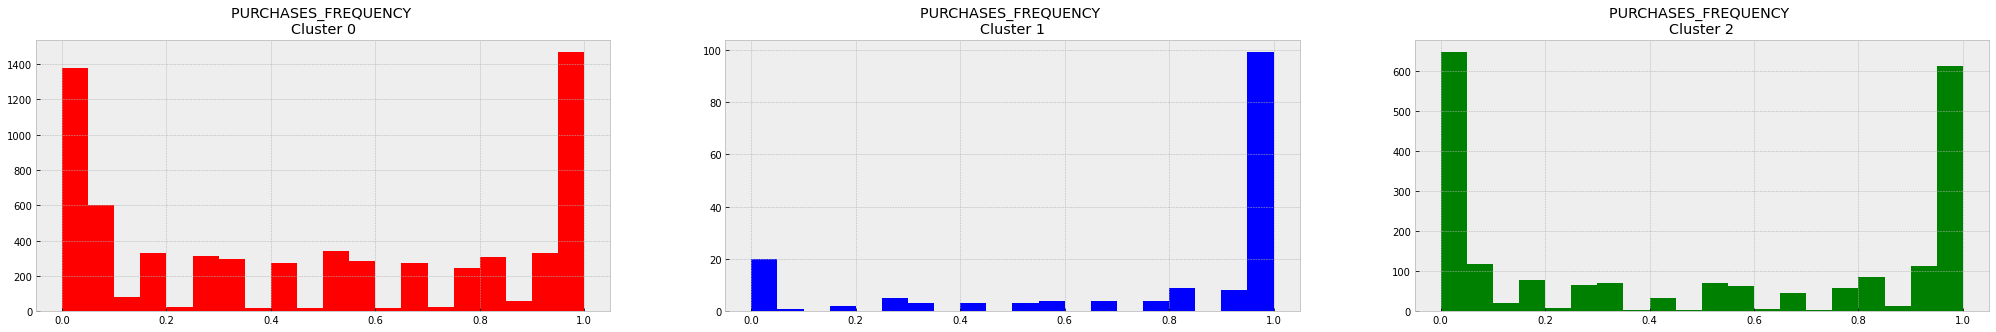

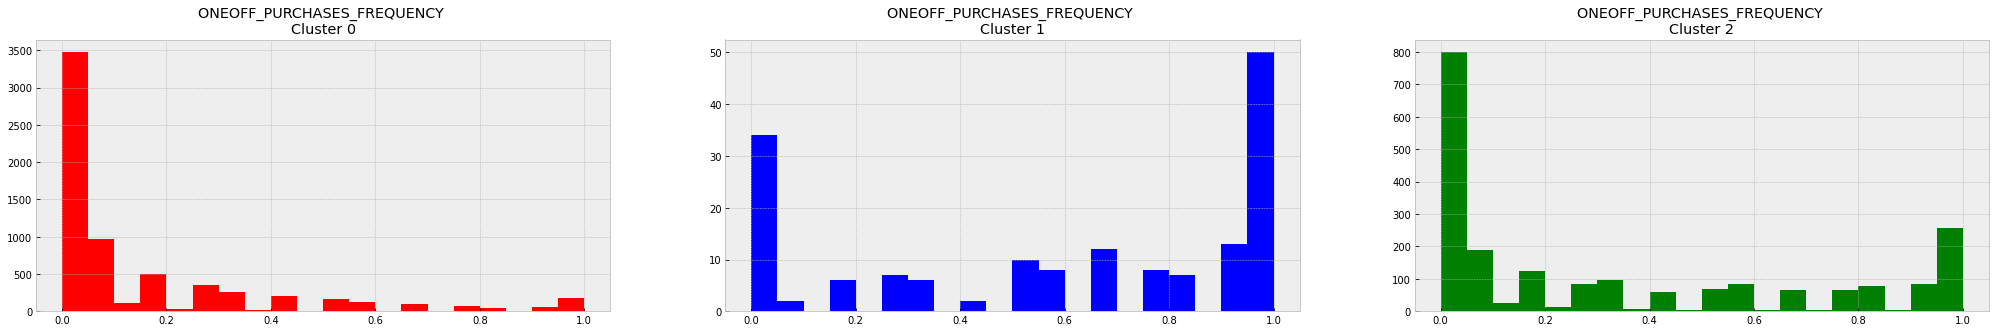

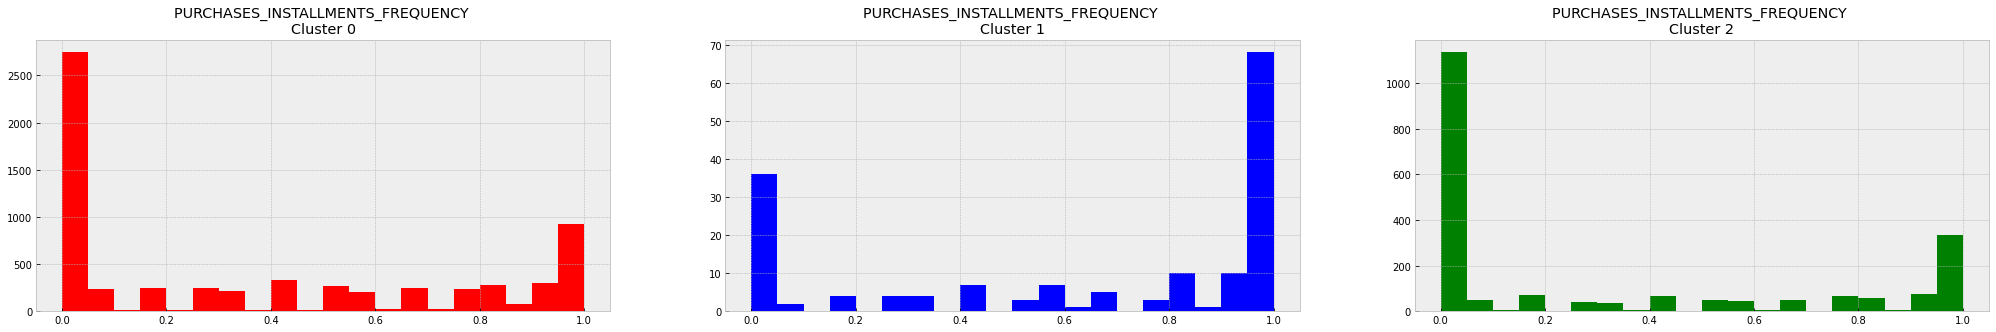

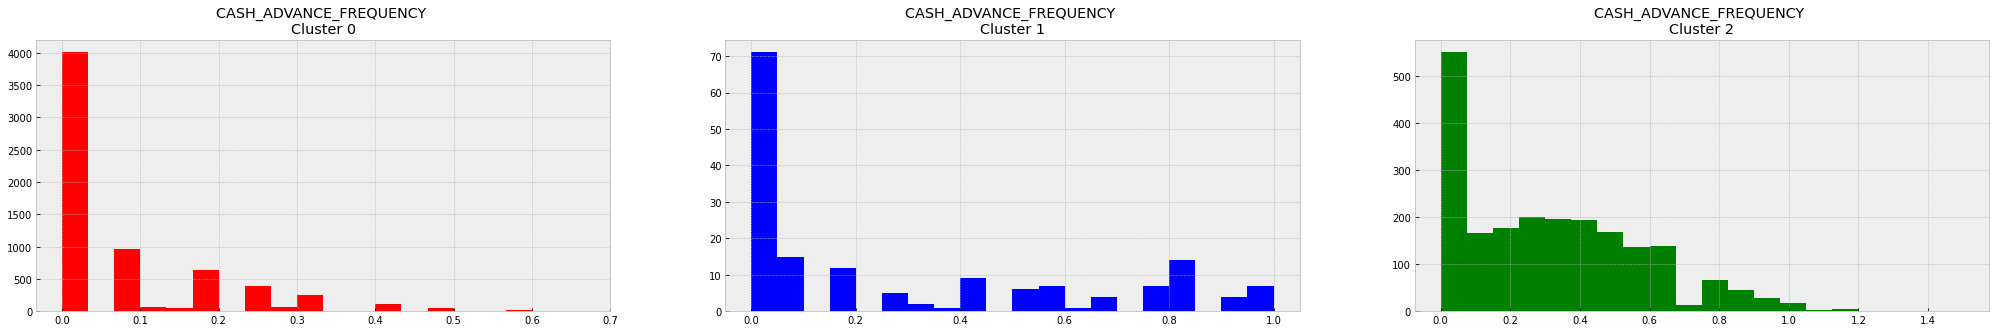

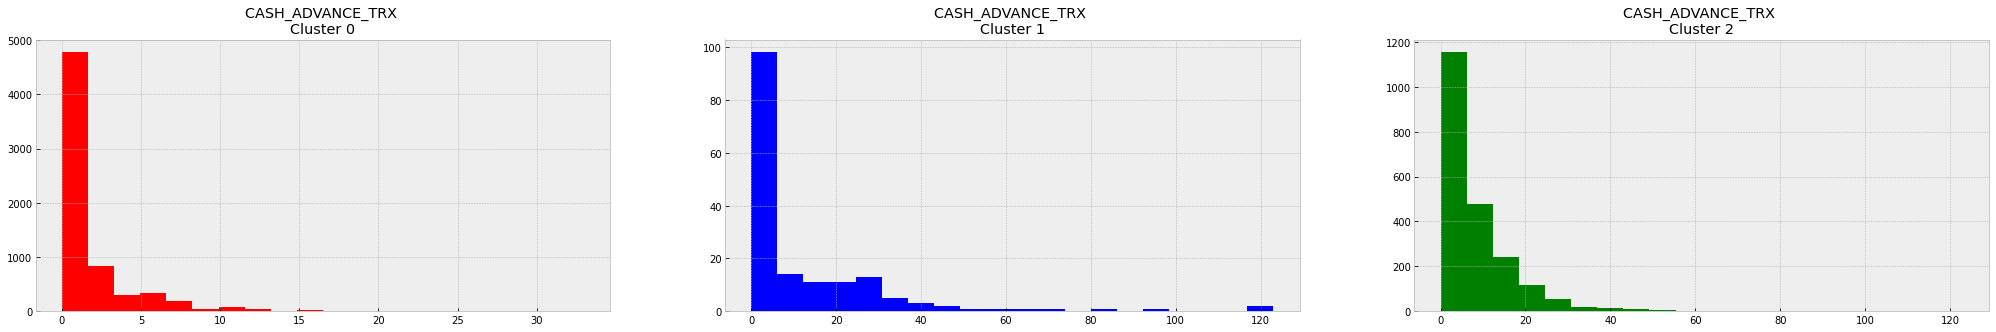

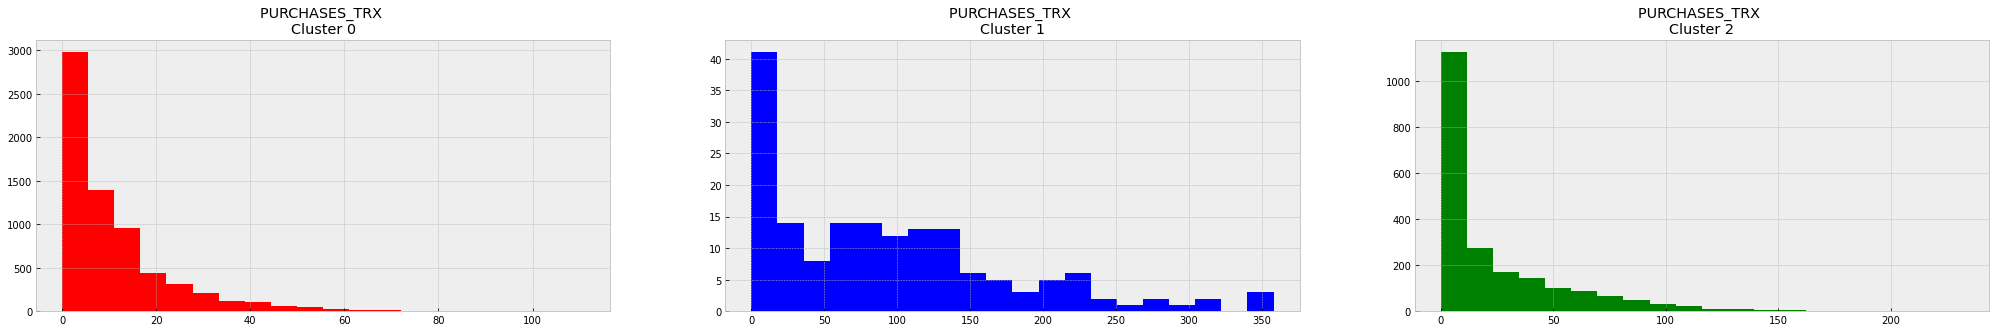

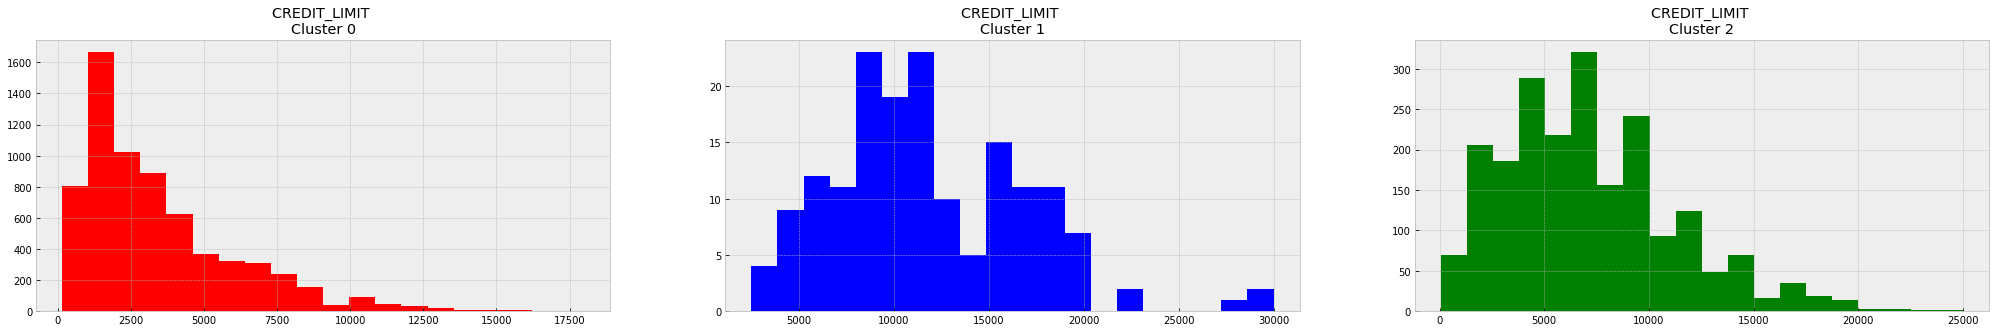

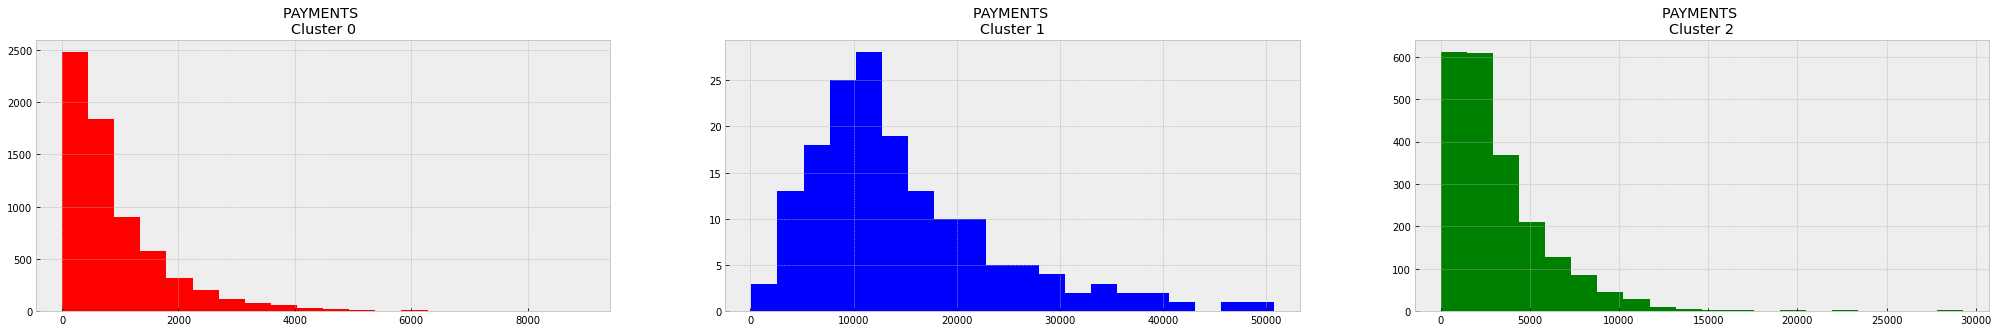

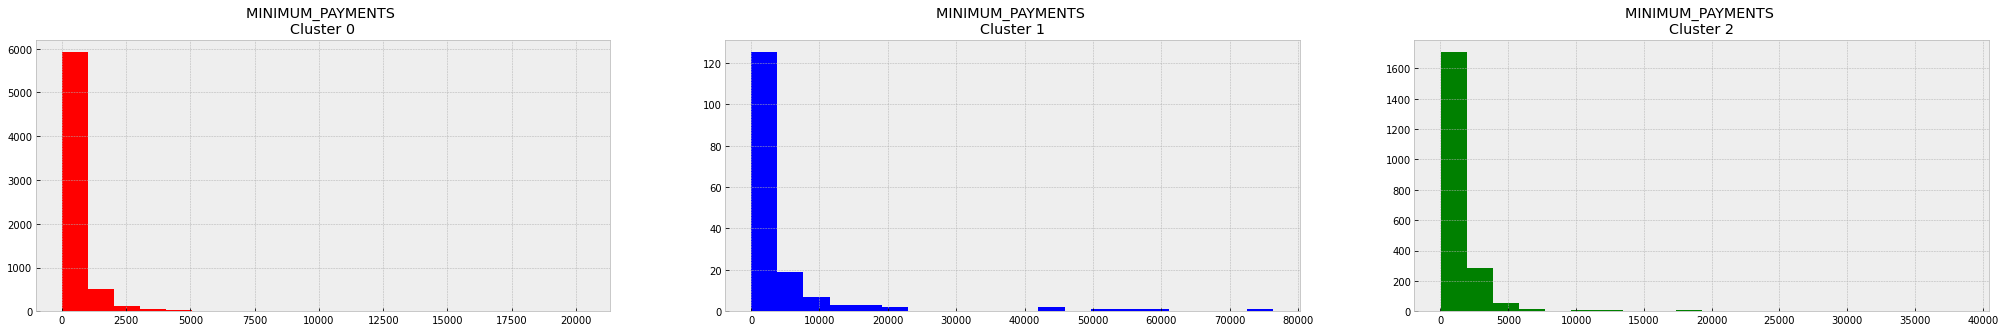

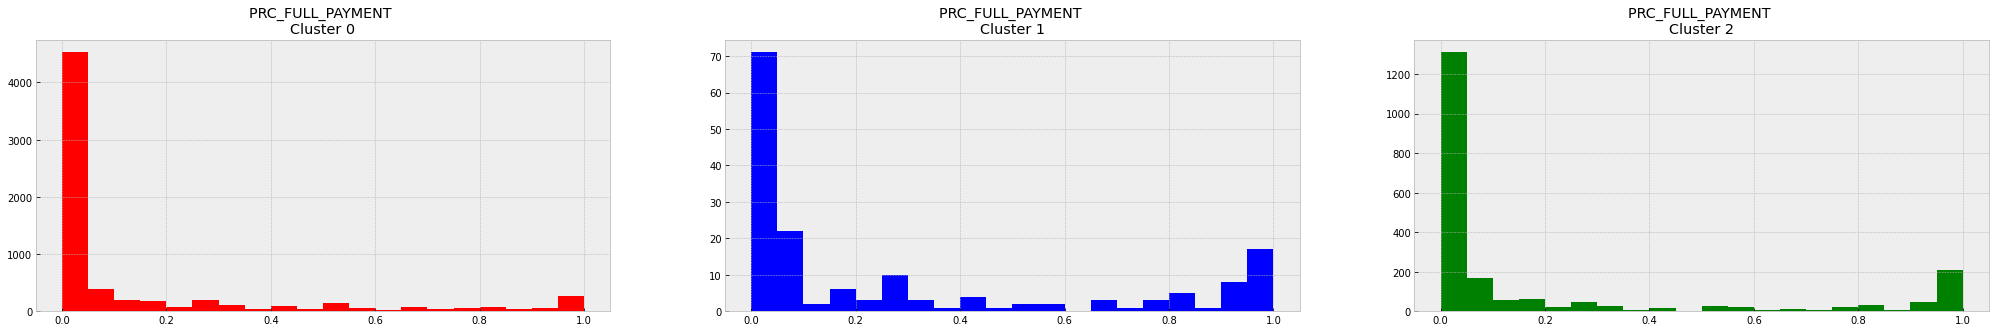

In [185]:
color = ['r', 'b', 'g']
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j,c in zip(range(3), color):
    plt.subplot(1, 3, j + 1)
    cluster = df_cluster_auto[df_cluster_auto['cluster'] == j]
    cluster[i].hist(bins = 20, color=c)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [186]:
# Vamos analisar as médias de 6 das variáveis mais significativas do Dataframe para cada Cluster 
variaveis = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PRC_FULL_PAYMENT', 'CREDIT_LIMIT', 'PAYMENTS']

In [187]:
df_cluster_0 = df_cluster_ordered.loc[df_cluster_ordered['cluster']==0]
df_cluster_1 = df_cluster_ordered.loc[df_cluster_ordered['cluster']==1]
df_cluster_2 = df_cluster_ordered.loc[df_cluster_ordered['cluster']==2]

In [188]:
df_cluster_0[variaveis].mean()

BALANCE              970.062780
PURCHASES            598.653490
CASH_ADVANCE         362.807754
PRC_FULL_PAYMENT       0.137807
CREDIT_LIMIT        3450.591555
PAYMENTS             925.276166
dtype: float64

In [189]:
df_medias = pd.DataFrame({'Cluster_0': df_cluster_0[variaveis].mean().values, 
                          'Cluster_1': df_cluster_1[variaveis].mean().values,
                          'Cluster_2': df_cluster_2[variaveis].mean().values}, 
                         index = df_cluster_0[variaveis].mean().index)

In [190]:
print('A média das features para cada Cluster de clientes')

df_medias

A média das features para cada Cluster de clientes


,Cluster_0,Cluster_1,Cluster_2
BALANCE,970.062780,5354.786370,3147.470848
PURCHASES,598.653490,9520.381818,1616.488333
CASH_ADVANCE,362.807754,5517.792955,2571.805622
PRC_FULL_PAYMENT,0.137807,0.280461,0.194101
CREDIT_LIMIT,3450.591555,11774.545455,7225.615607
PAYMENTS,925.276166,14695.088892,3274.114011


# CONCLUSÕES

- Os valores apresentados, são uma média dos valores das respectivas variáveis, em cada cluster, por exemplo, os clientes do cluster 2, em média, possuem um limite de crédito de U$ 5226.35.

- Esse é o momento de deduzir conclusões mais aprofundadas. Essas deduções são subjetivas e irão depender muito do objetivo da empresa, mas vamos aqui fazer algumas análises que possam ser de grande valor:

- **Cluster 0**: Clientes com limite de crédito médio; Fazem compras com baixos valores; Não pagam em dia.

- **Cluster 1**: Clientes com limite de crédito baixo; Fazem compras com baixos valores; Não pagam em dia.

- **Cluster 2**: Clientes com limite de crédito alto; Fazem compras com grandes valores; Pagam em dia.





## Planos de Ação

**Com essas deduções baseadas nos clusters, podemos pensar em estratégias como**:

- Já que os clientes do cluster 0 não pagam em dia e possuem um limite de crédito razoável, não seria interessante diminuir esse limite para que a empresa não sofra com prejuízos maiores?

- Já que os clientes do cluster 1 possuem um alto limite de crédito, porém fazem compras com pequenos valores, não seria interessante, por exemplo, fazer uma parceria com alguma empresa que fornece pontos por gastos em cartões de crédito para fazer com que esses clientes gastem mais?


- Já que os clientes do cluster 2 fazem compras com grandes valores e pagam em dia, não seria interessante aumentar o limite de crédito desses clientes para que eles possam gastar mais e gerar mais lucro para a empresa?

Enfim, essas são algumas das deduções que conseguimos fazer, mas, como sabemos, tudo isso é bem subjetivo e depende do que a empresa quer no momento e se a estratégia x, y ou z faz sentido nesse momento. Não necessariamente existe um certo ou errado nessas análises, isso depende do objetivo final.